In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# Load scaled training data
df = pd.read_csv('scaled_train_data.csv')

# Display features and counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Area                         328 non-null    object 
 1   Soil group                   328 non-null    object 
 2   Land class                   328 non-null    object 
 3   Soil type                    328 non-null    object 
 4   pH                           328 non-null    float64
 5   SOC                          328 non-null    float64
 6   Nitrogen                     328 non-null    float64
 7   Potassium                    328 non-null    float64
 8   Phosphorus                   328 non-null    float64
 9   Sulfur                       328 non-null    float64
 10  Boron                        328 non-null    float64
 11  Zinc                         328 non-null    float64
 12  Sand                         328 non-null    float64
 13  Silt                

## Seperate target features from categorical features and numerical features 

In [28]:
target_cols = ['SOC', 'Zinc', 'Boron']
categorical_cols = ['Area', 'Soil group', 'Land class', 'Soil type']
numerical_cols = ['pH', 'Nitrogen', 'Potassium', 'Phosphorus', 'Sulfur', 'Sand', 'Silt', 'Clay', 'Clay * pH', 'Clay * Nitrogen', 'Phosphorus * Nitrogen']

## Look at frequency of categorical features and which cluster they fit in to

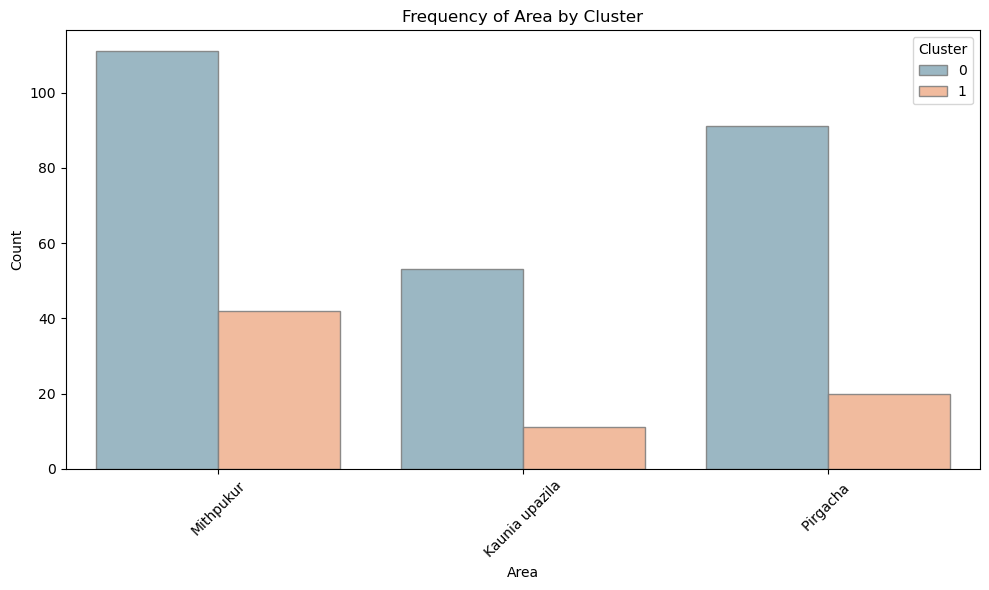

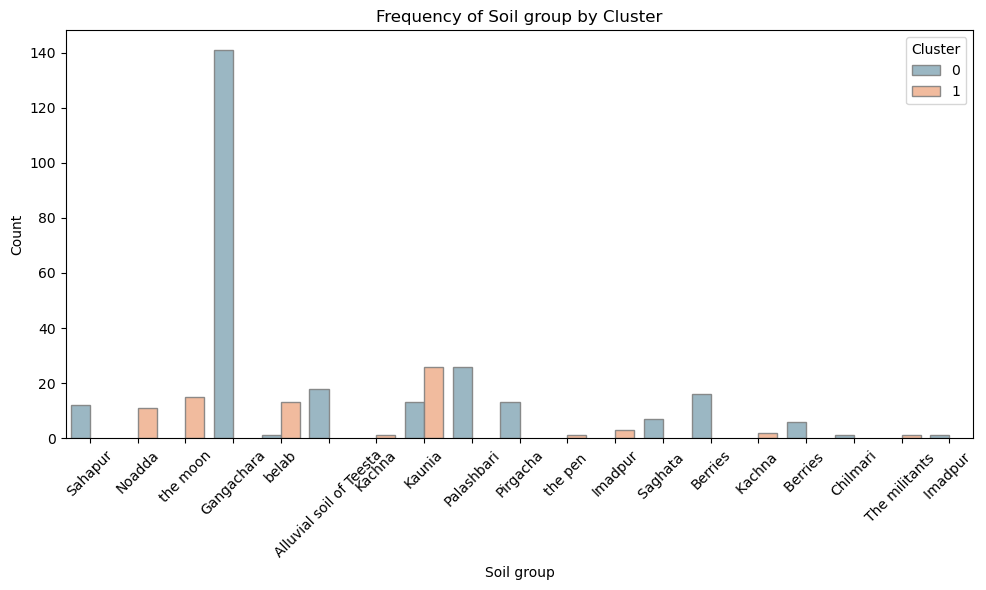

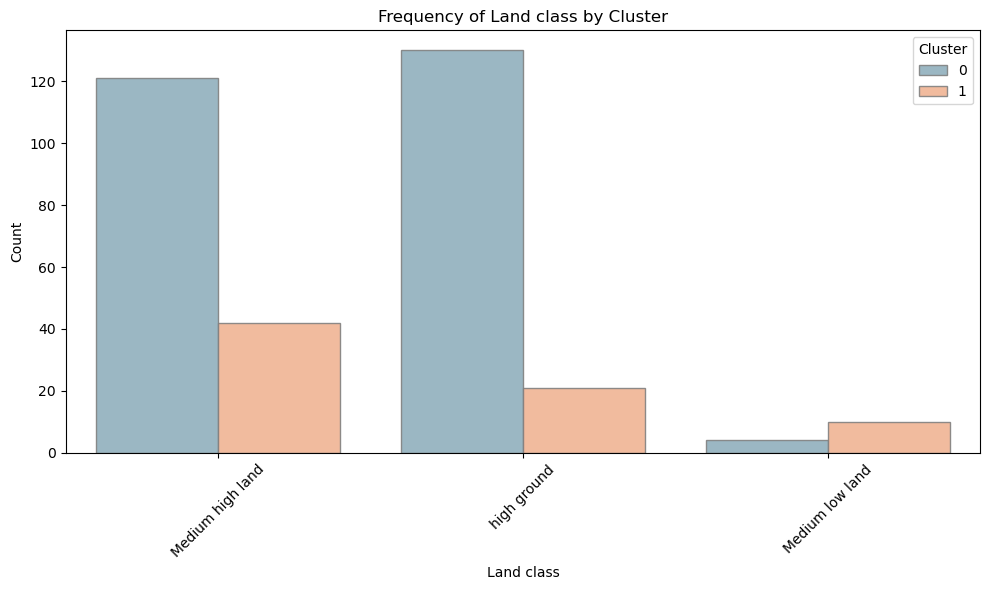

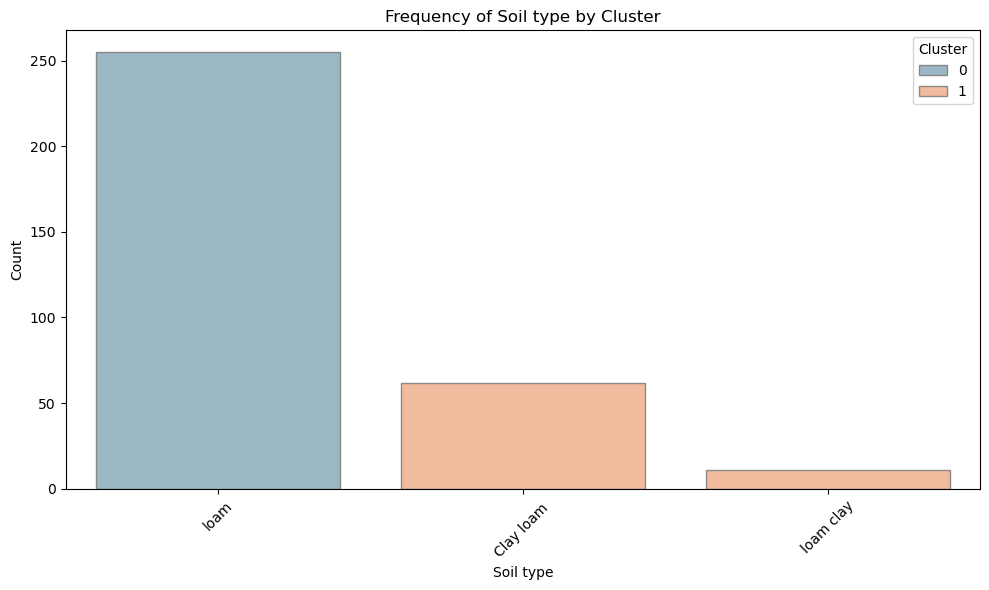

In [29]:
custome_palette = ['#89B3C4', '#FFB085']

sns.set_palette(custome_palette)

for cat in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df,
                  x=cat,
                  hue='Cluster',
                 edgecolor='grey',
                 linewidth=1,
                 alpha=0.9
    )
    plt.title(f"Frequency of {cat} by Cluster")
    plt.xlabel(cat)
    plt.ylabel("Count")
    plt.legend(title="Cluster")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### It appears that the soil type was quite a determining factor for which cluster the data was grouped in to.

## Using violin plots to look at how the target variables are distributed across the categorical variables as well as differentiated by the clusters

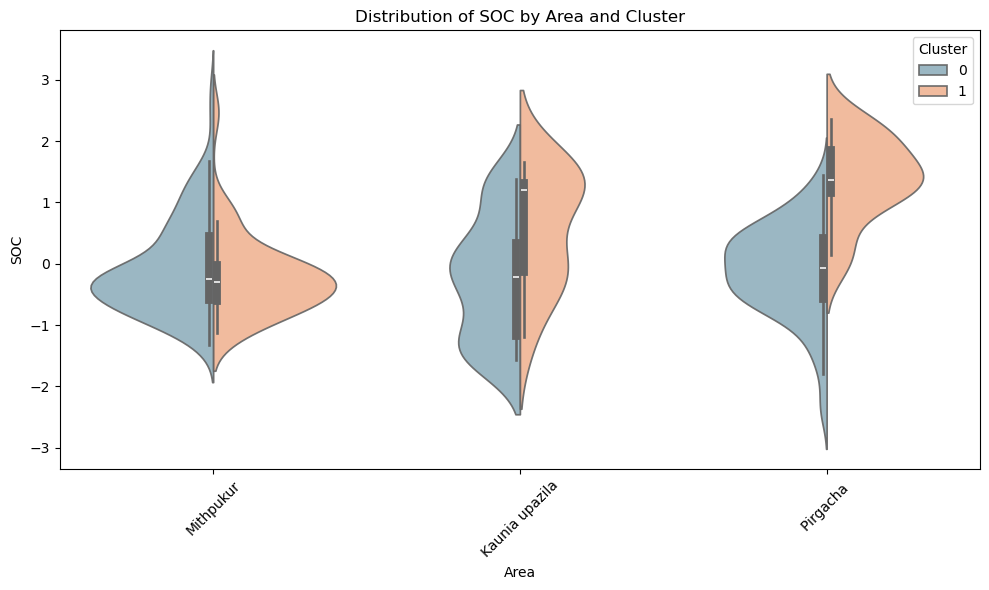

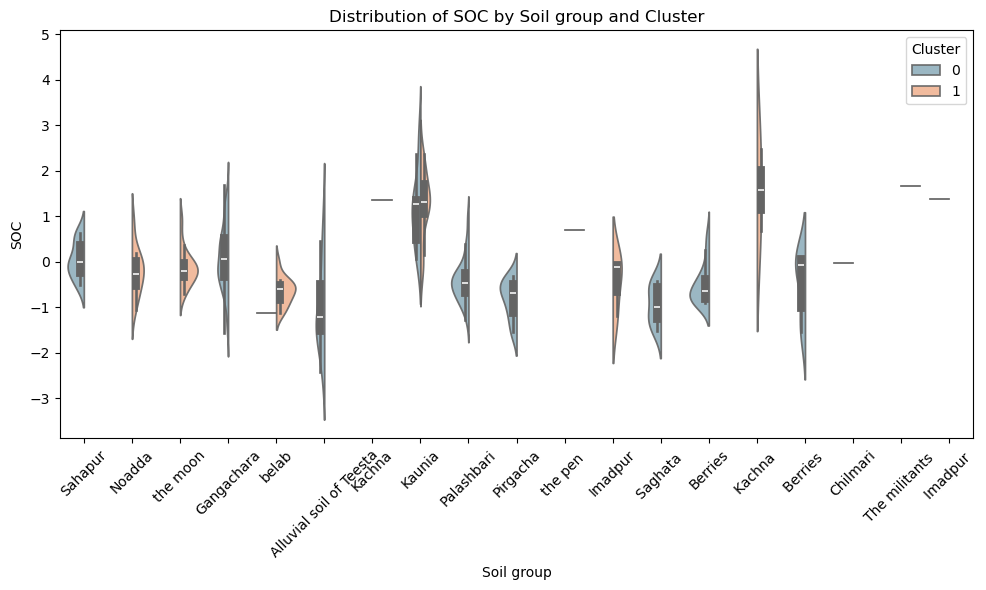

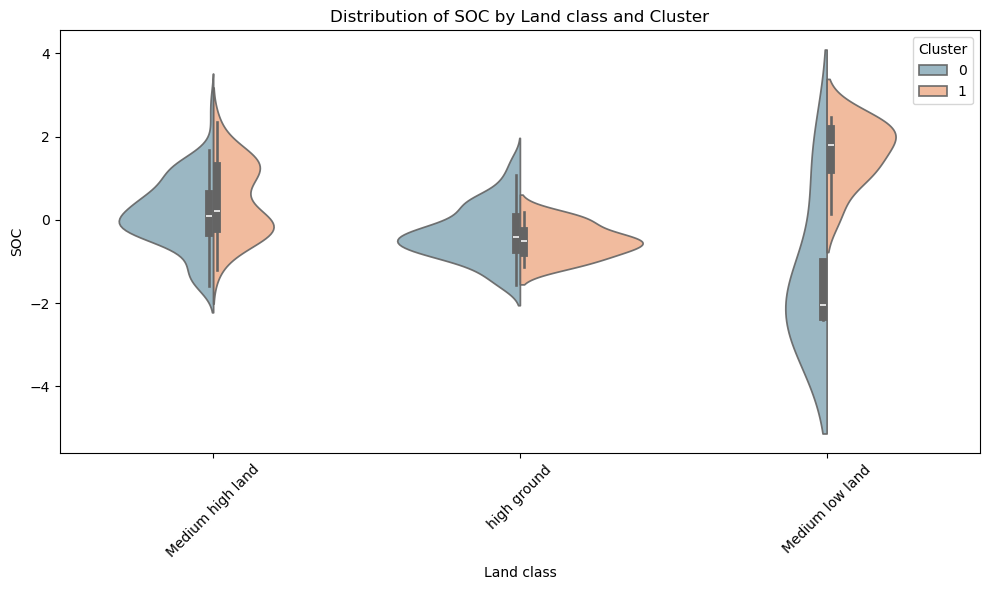

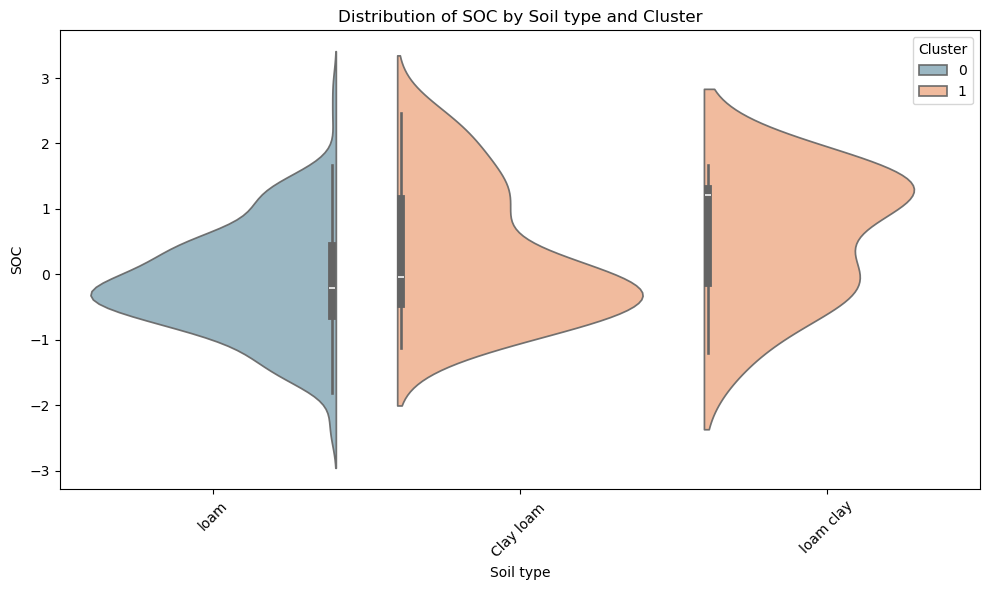

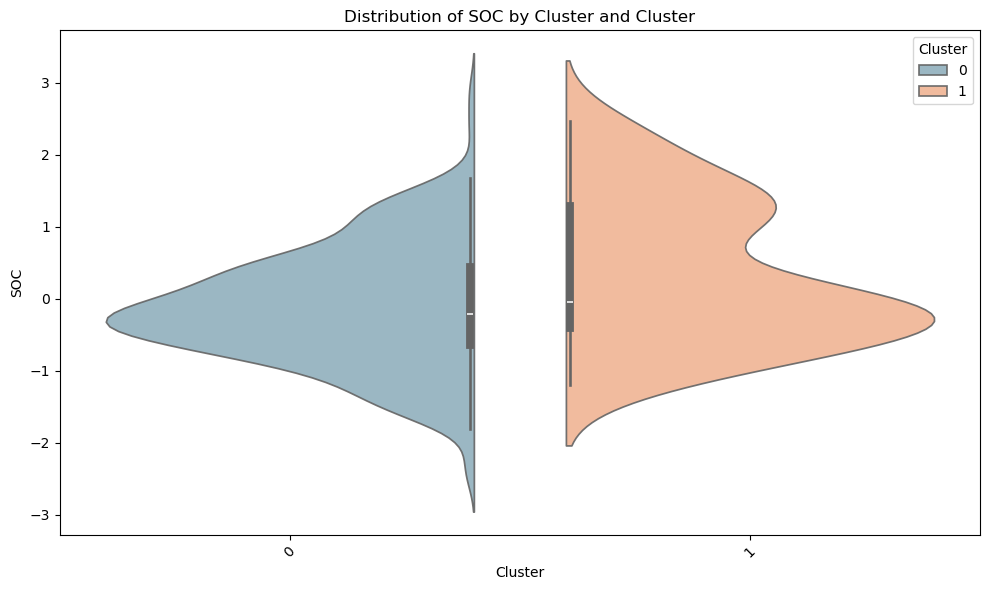

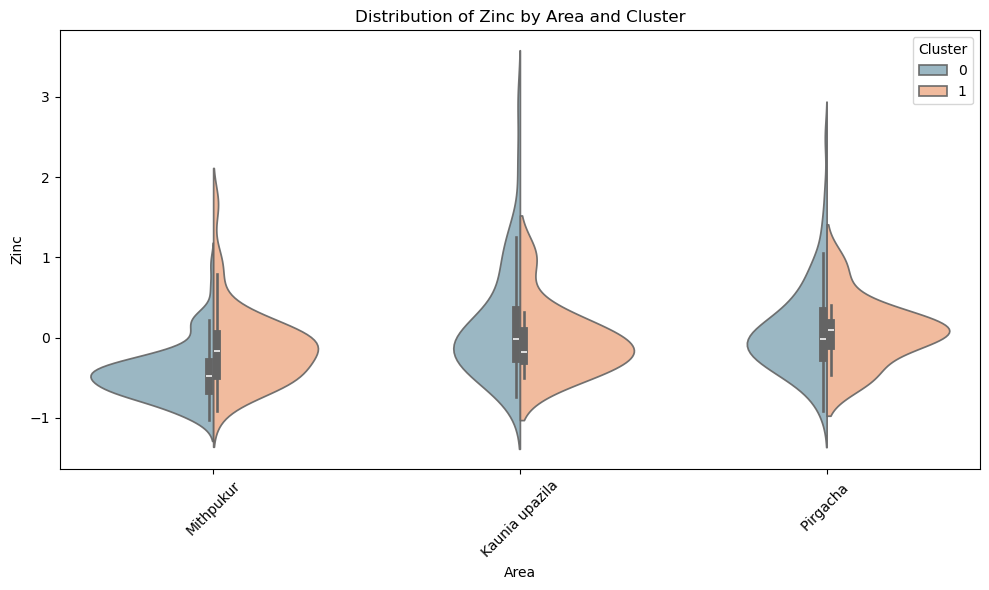

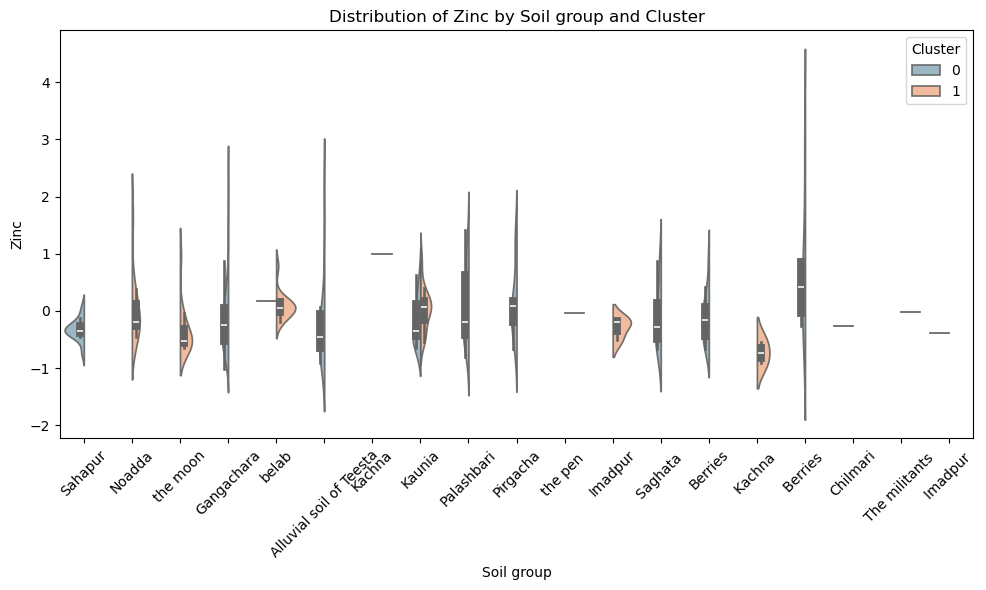

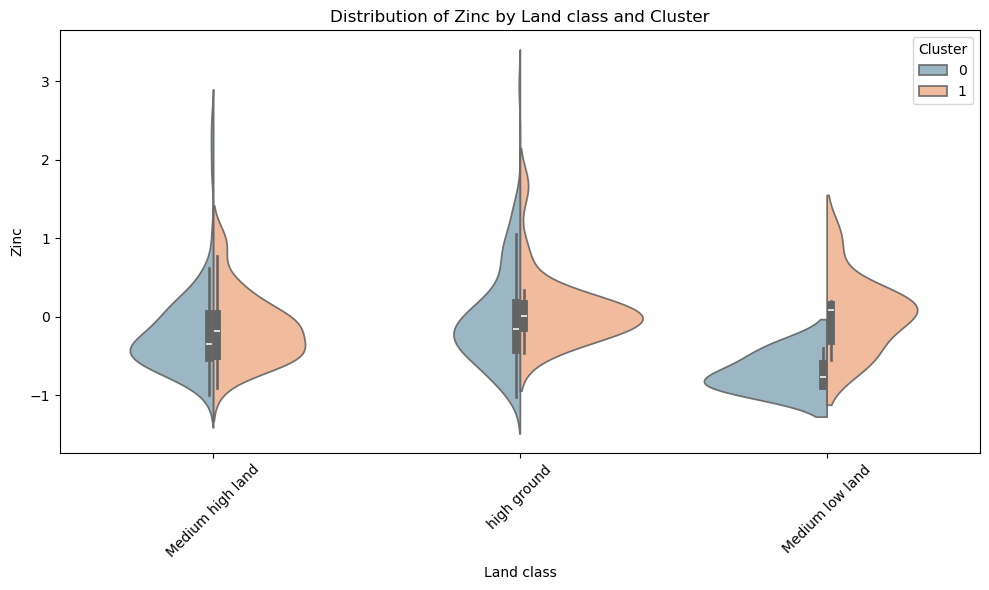

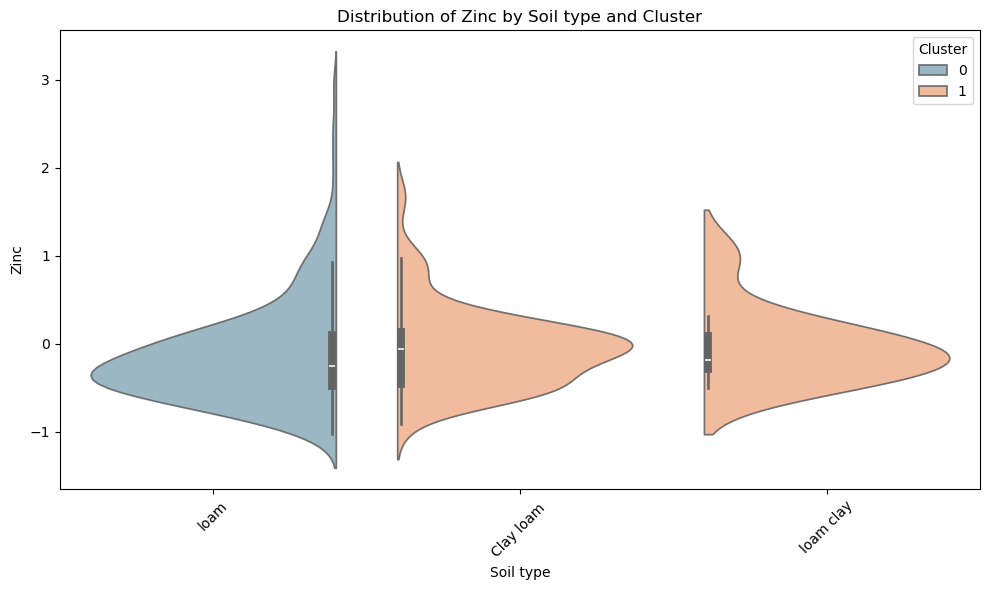

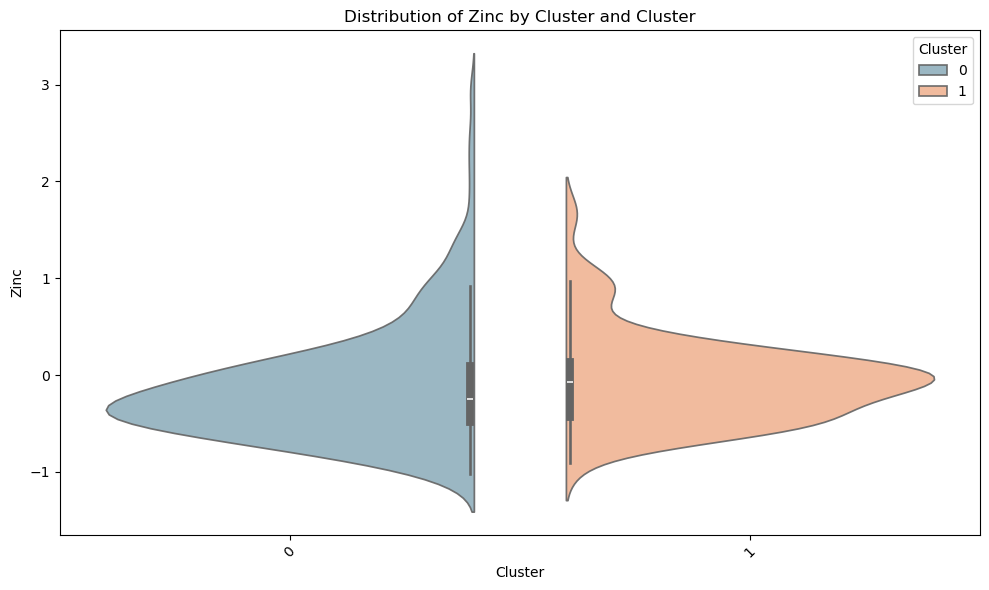

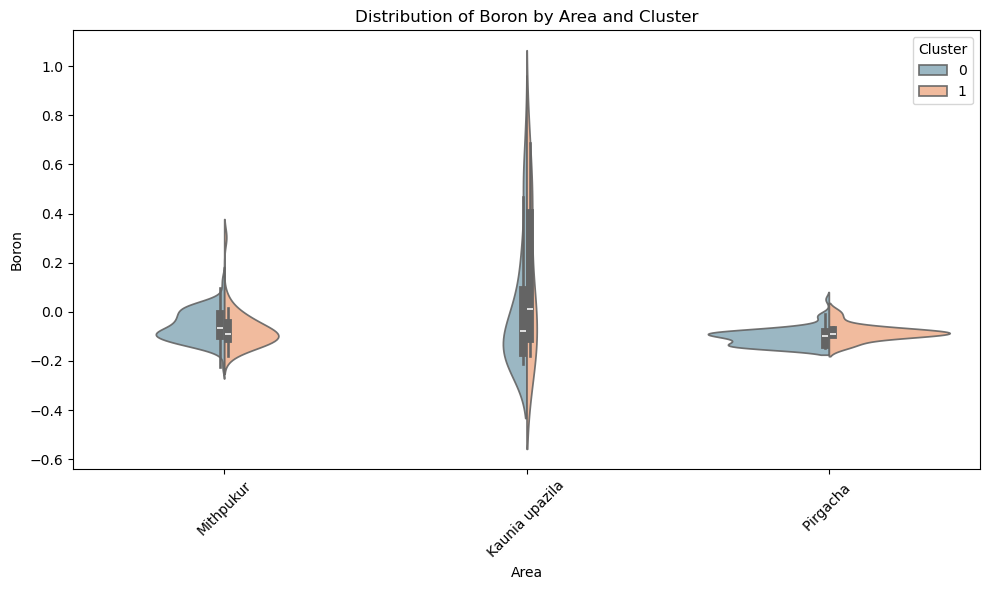

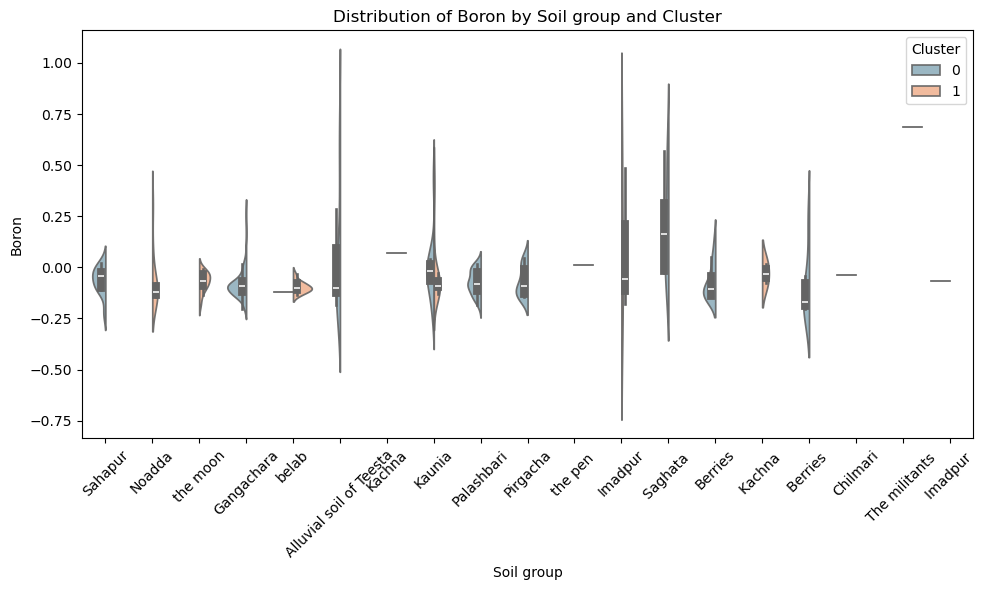

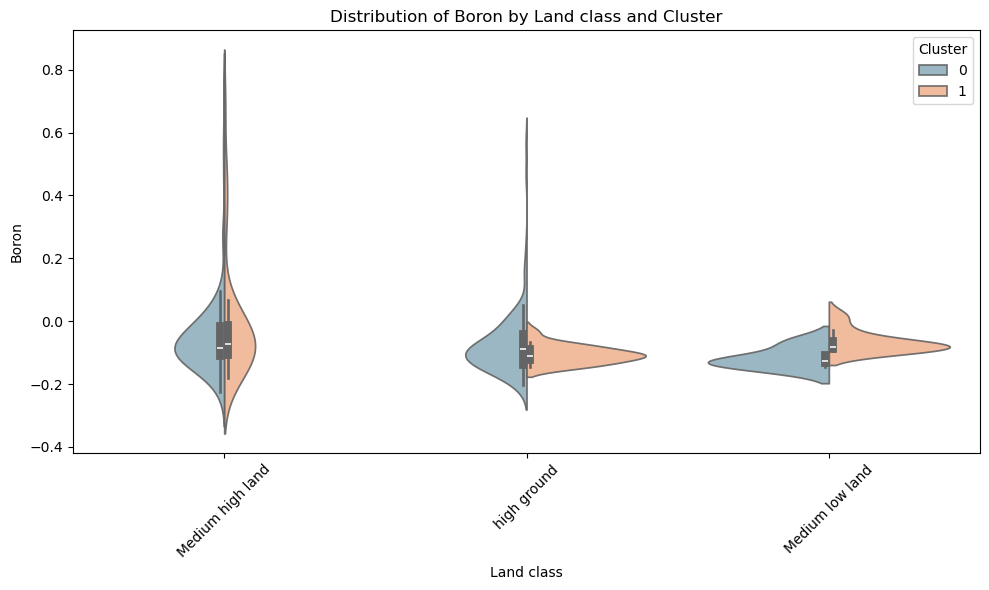

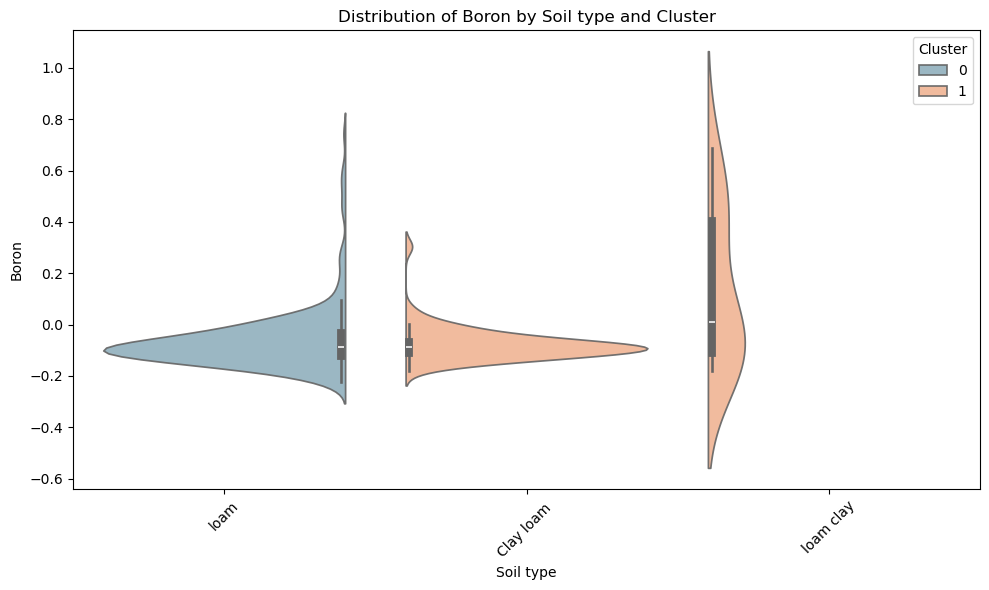

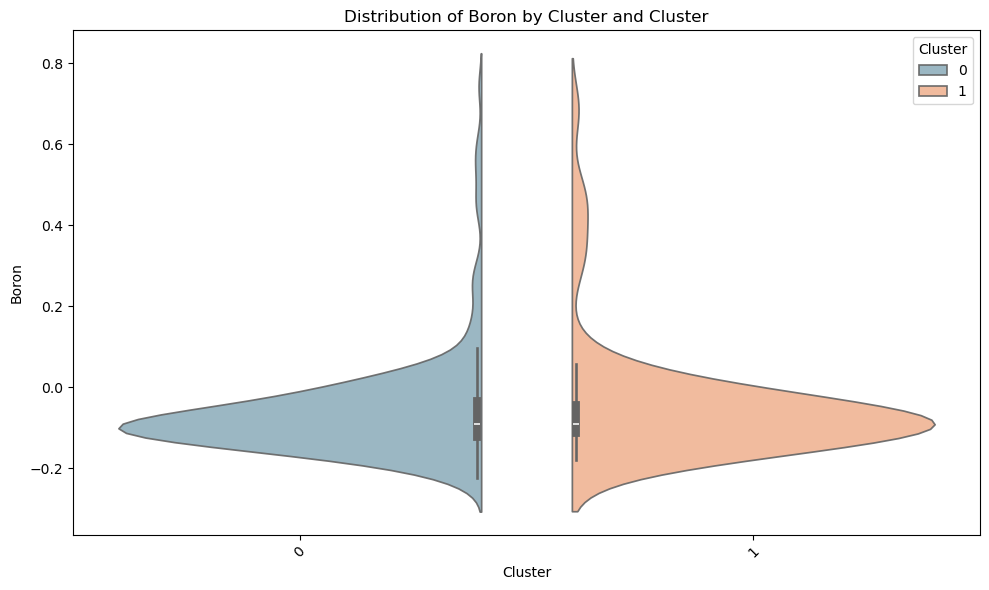

In [30]:
for target in target_cols:
    for cat in categorical_cols + ['Cluster']:  # Including cluster column
        plt.figure(figsize=(10, 6))
        sns.violinplot(data=df,
                       x=cat,
                       y=target,
                       hue='Cluster',
                       split=True,
                       alpha=0.9
        )
        plt.title(f"Distribution of {target} by {cat} and Cluster")
        plt.xlabel(cat)
        plt.ylabel(target)
        plt.legend(title="Cluster")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

### SOC 
- Quite varied across all the soil groups
- Differentiated by the clusters in the Pirgacha area as well as in the medium low land
- Mixture of distributions that were normal, skewed and bimodal
### Zinc
- Not as varied as SOC across soil groups
- Some outliers as indicated by long tails on distributions
- Differentiated by the cluster in medium low land
- Quite consistent distribution among soil type and clusters for soil type

### Boron
- High variance in the Kaunia upazila area and very low variance in the Pirgacha region
- Not as varied as SOC by soil group
- High variance by some soil groups and quite consistent in others
- Highly varied in loam clay soil type, less so in loam and clay loam soil
- Notable tail in distribution on the high end of boron concentrations, otherwise normally distributed

## Using violin plots to look at how the numerical variables and engineered features are distributed across the categorical variables as well as differentiated by the clusters

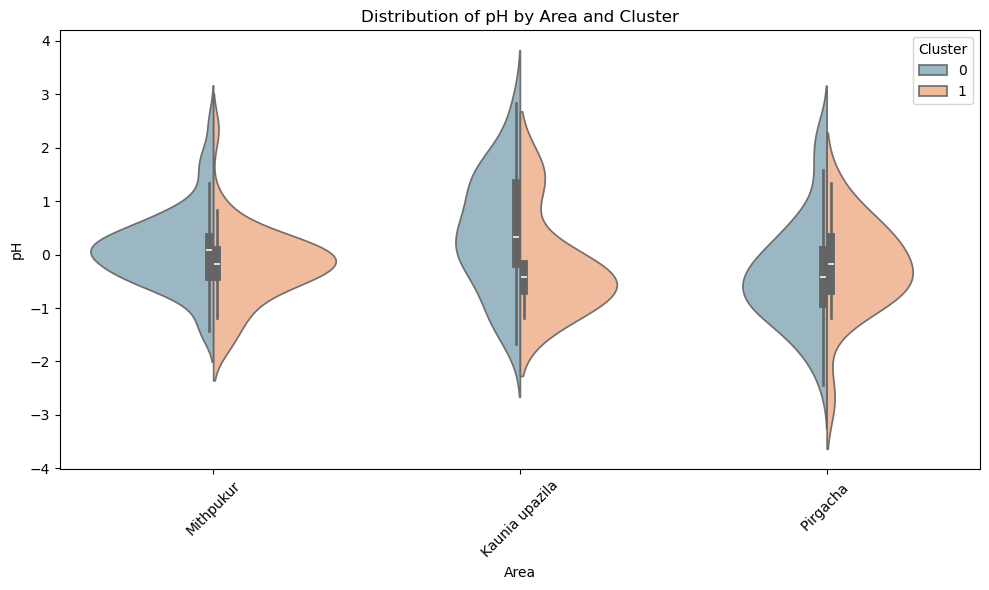

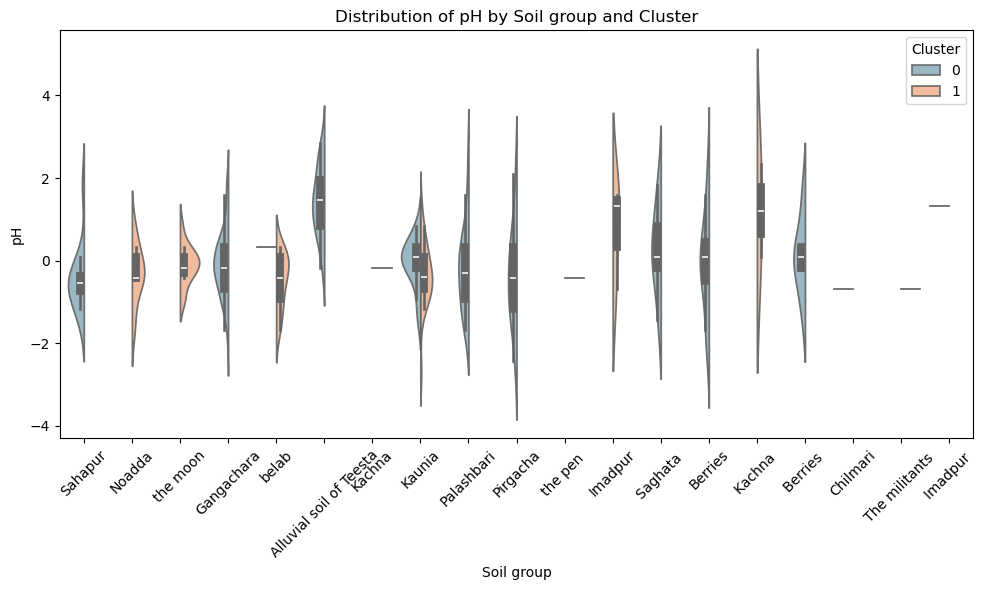

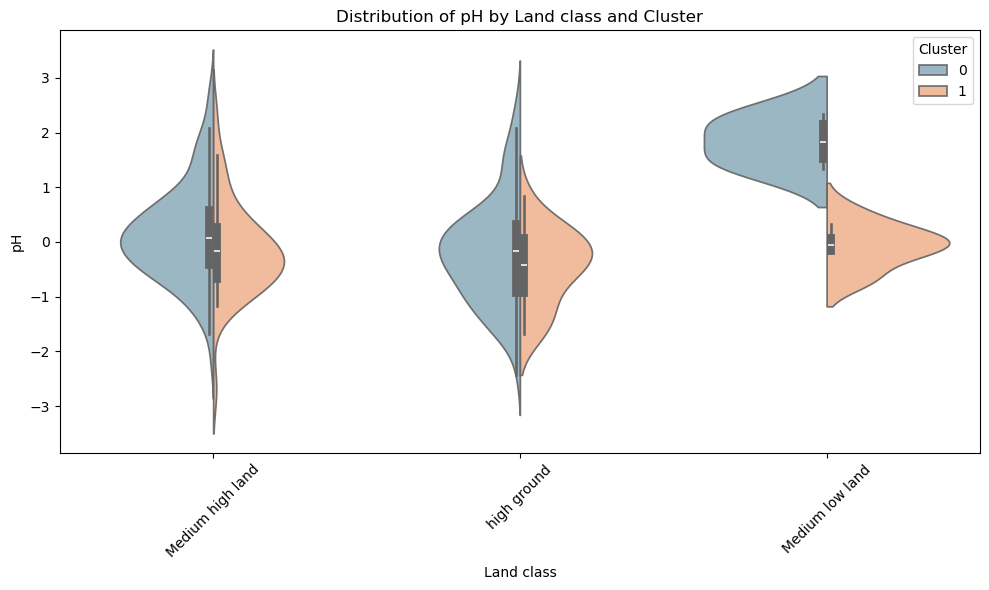

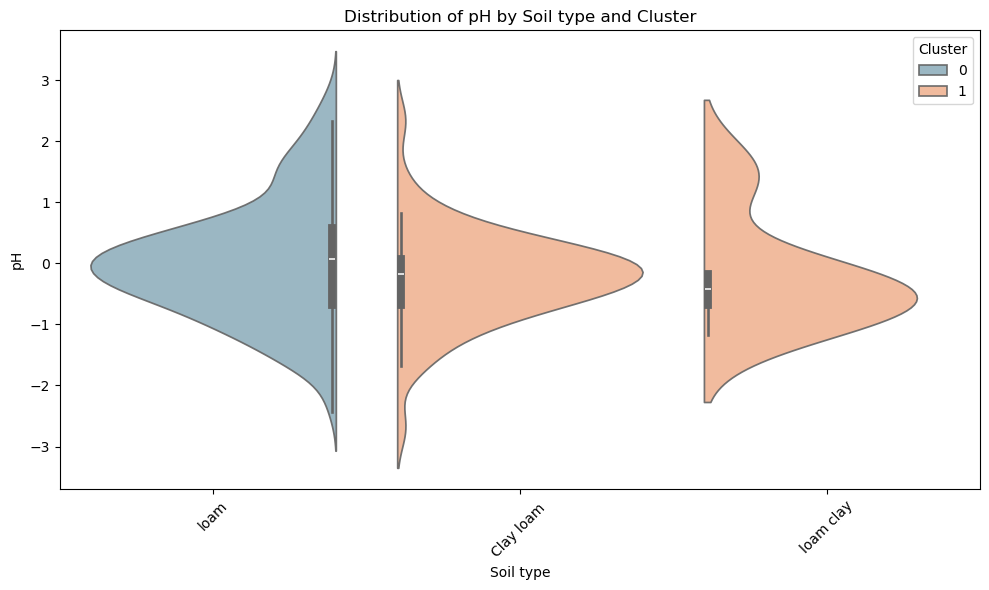

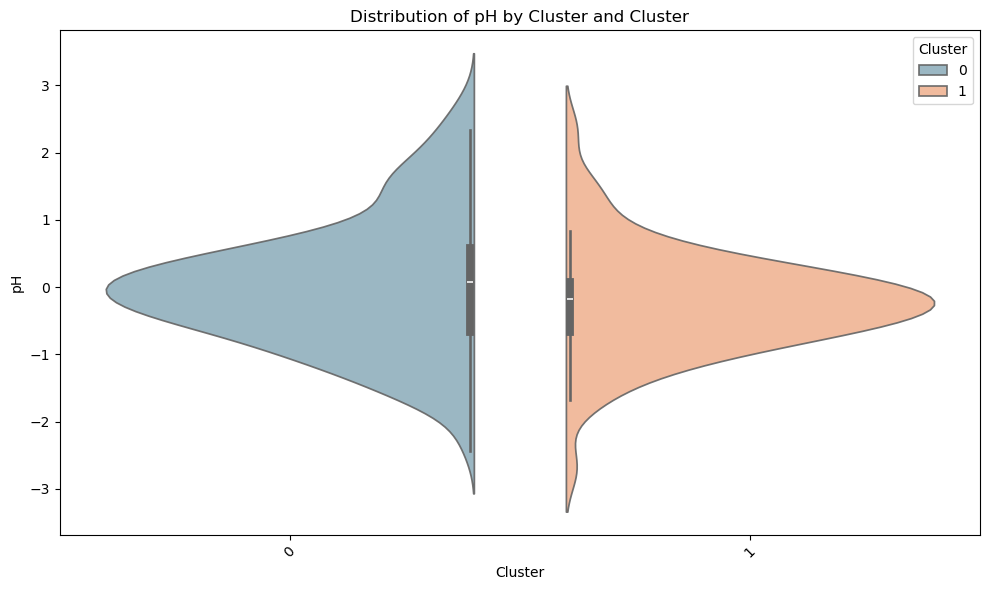

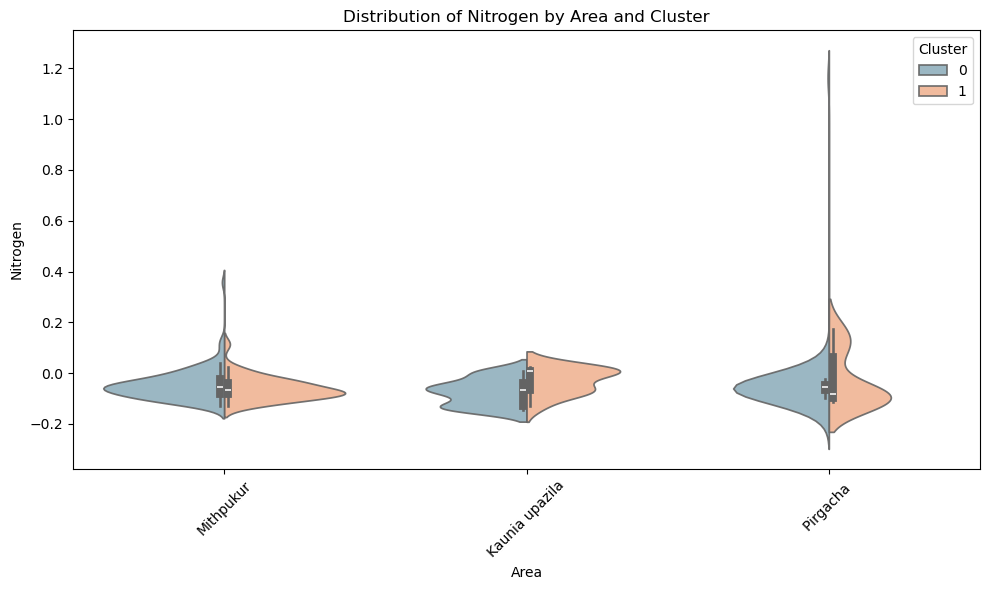

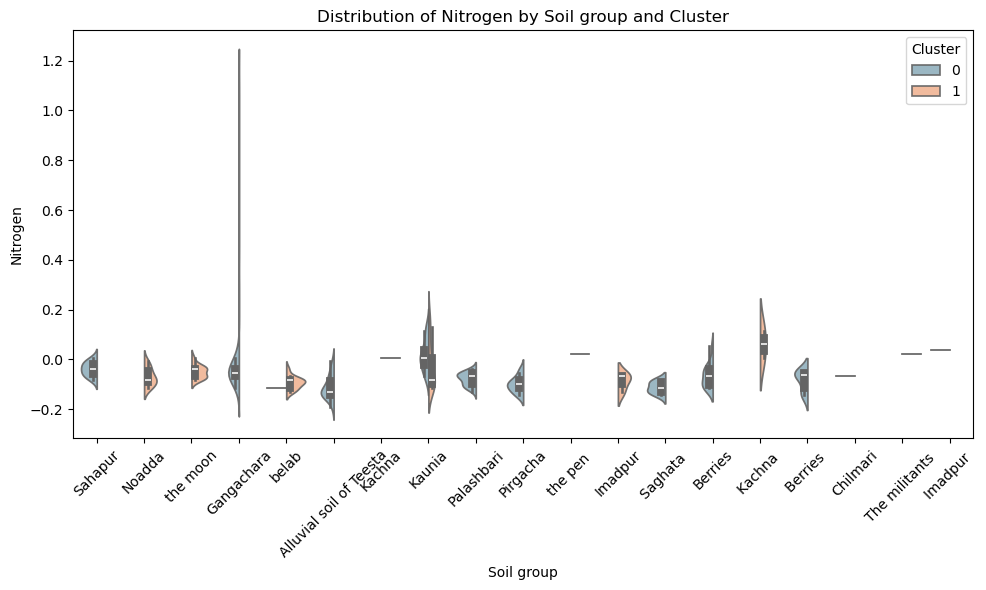

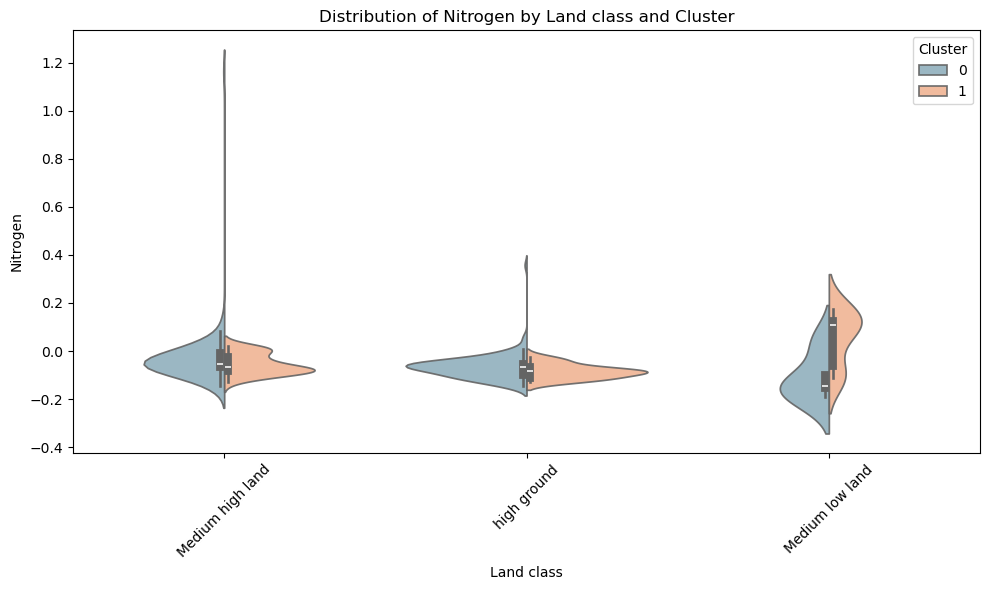

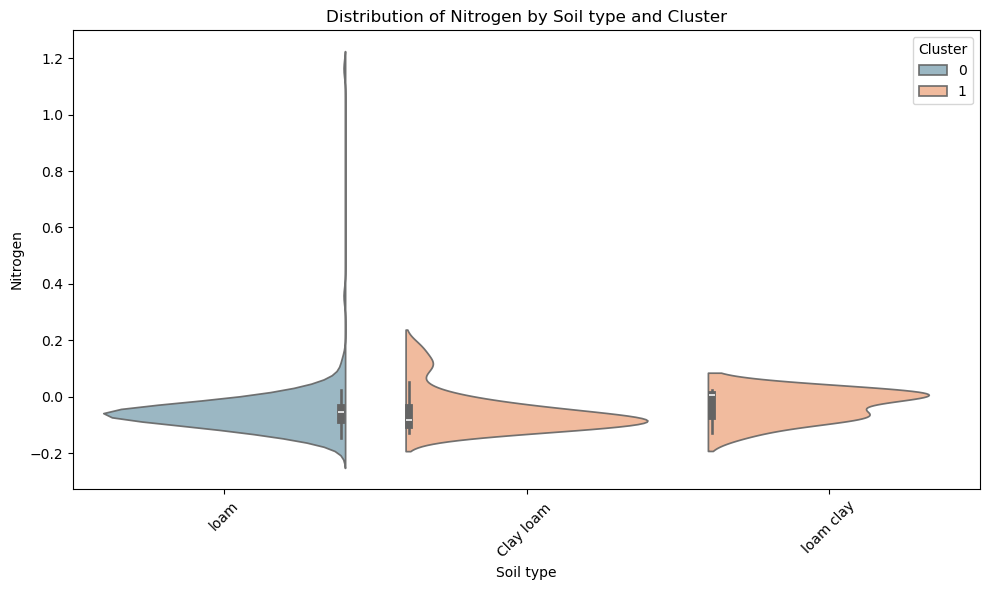

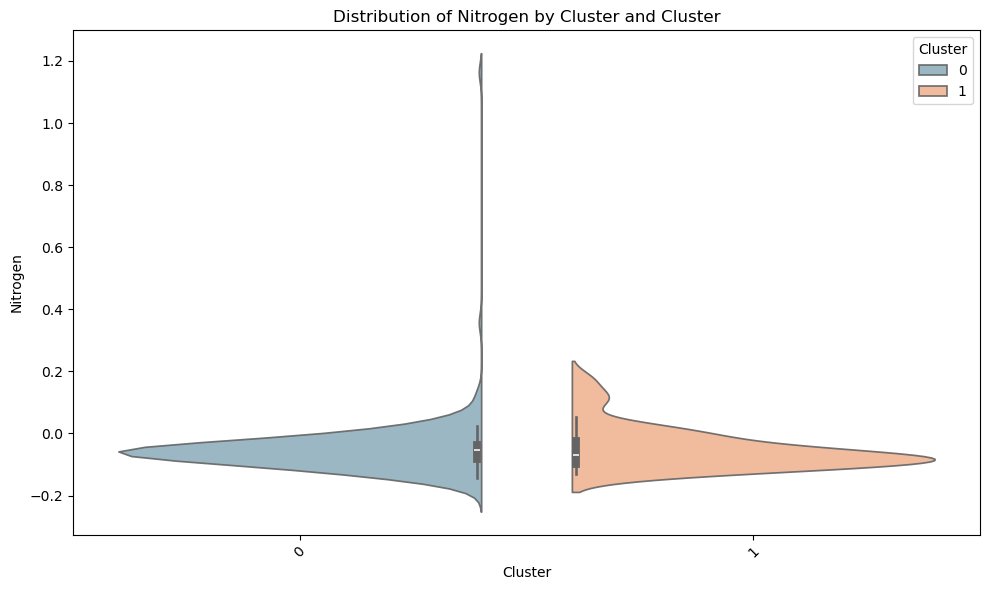

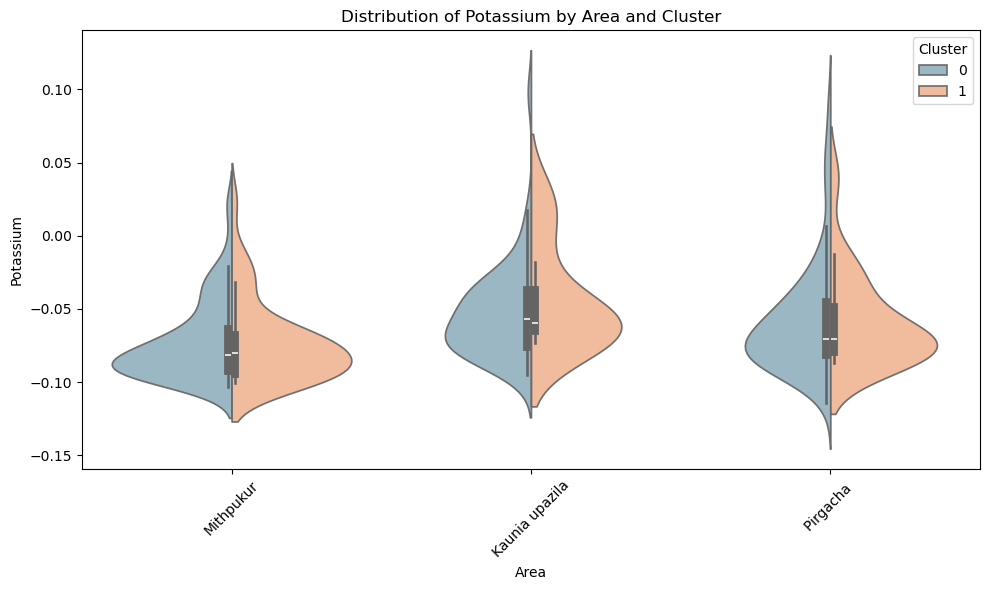

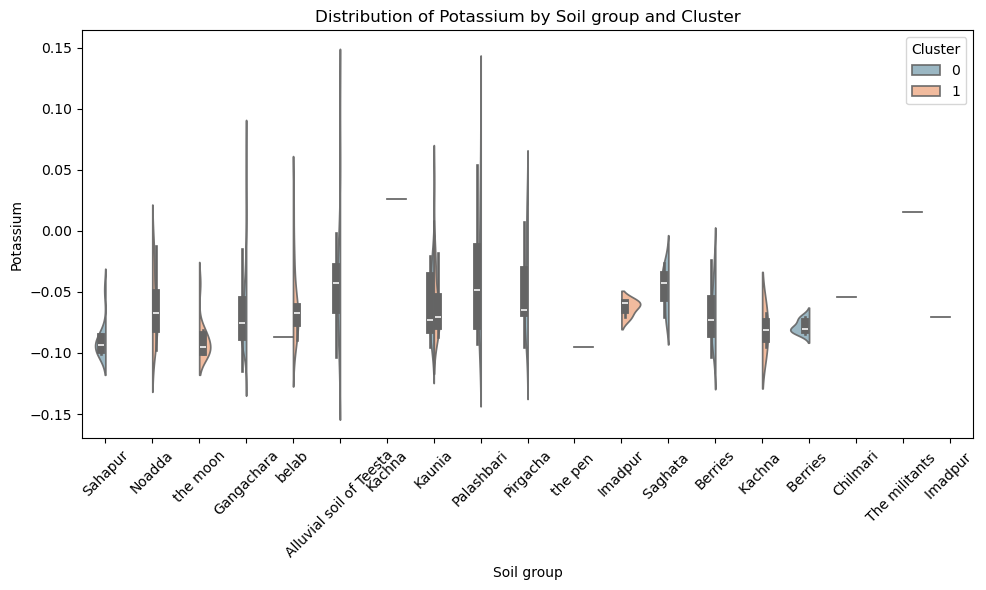

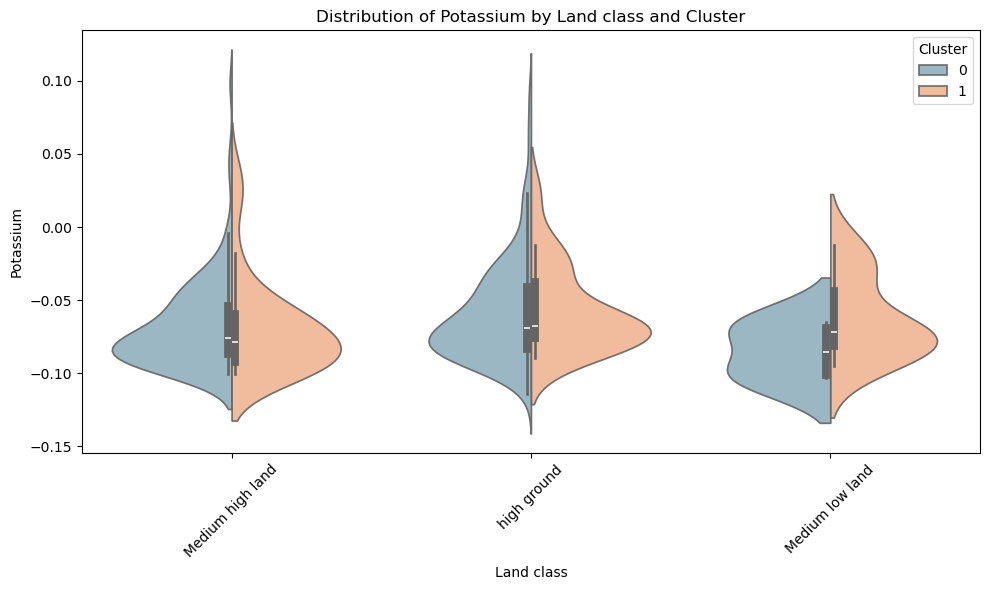

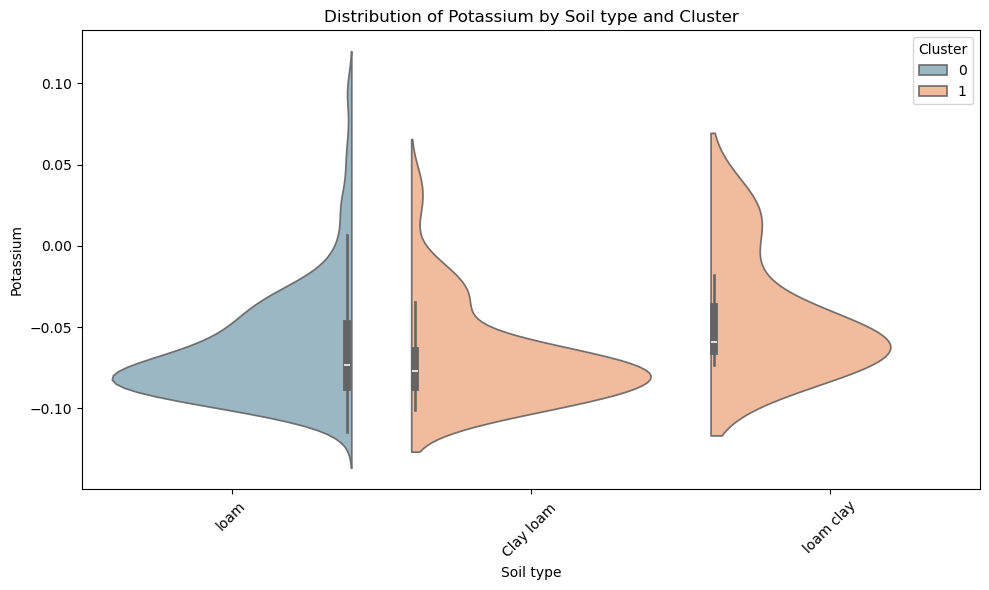

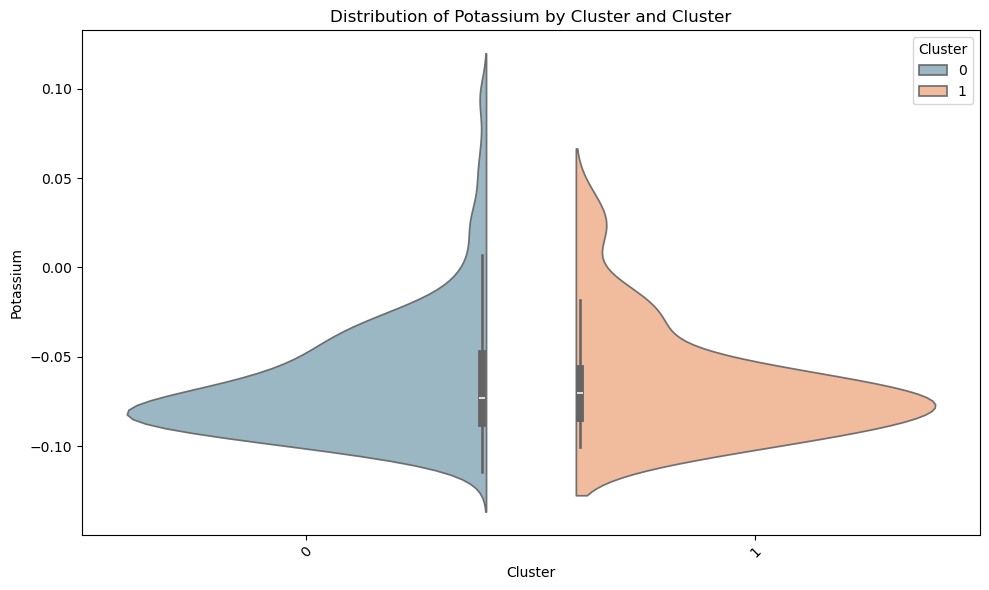

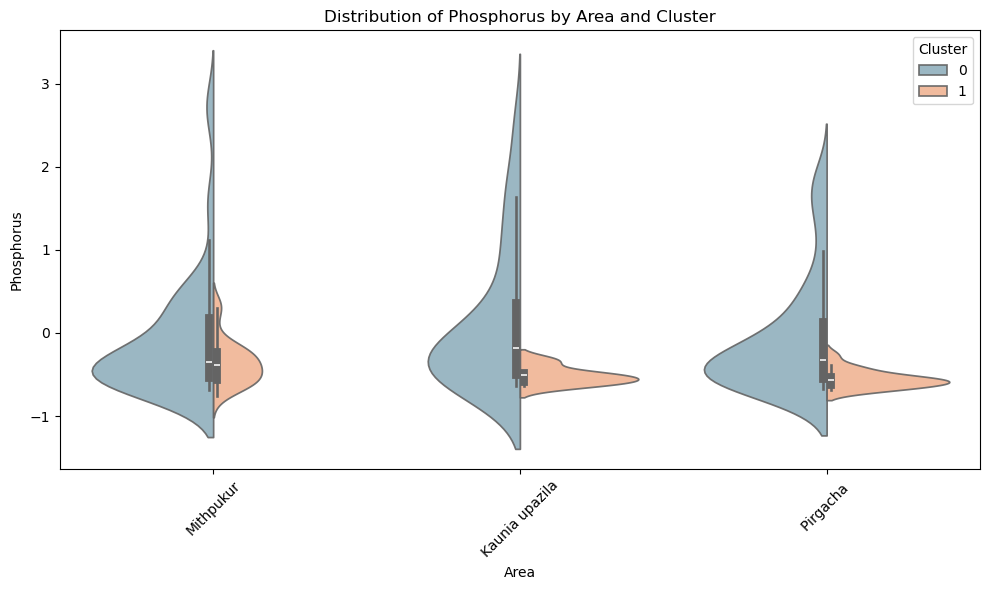

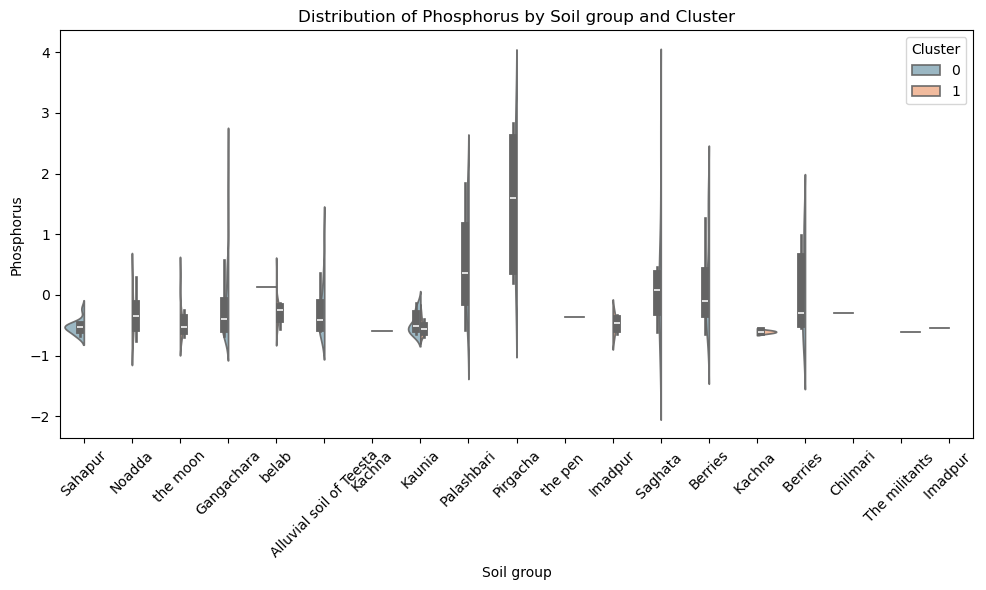

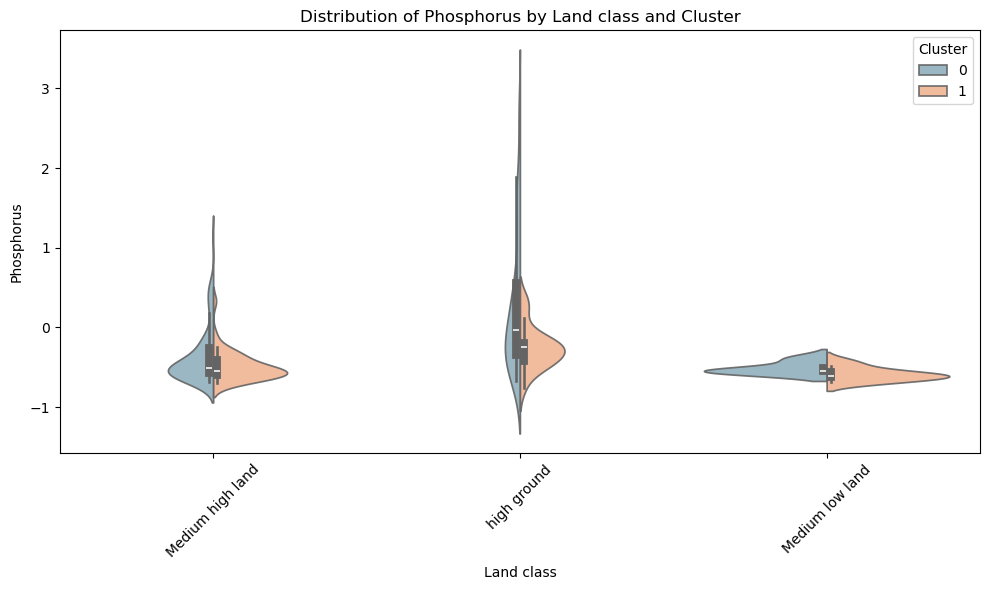

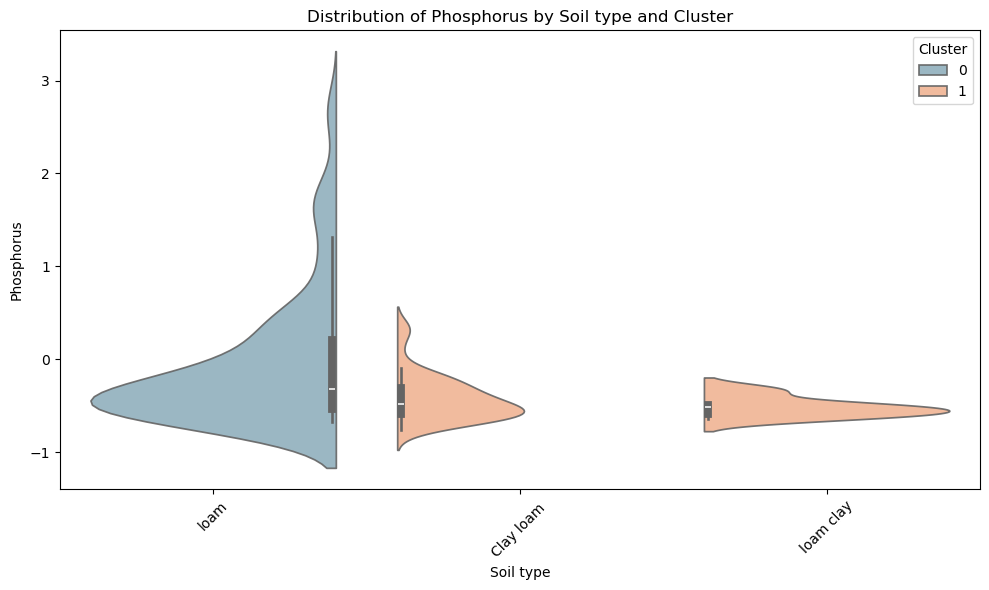

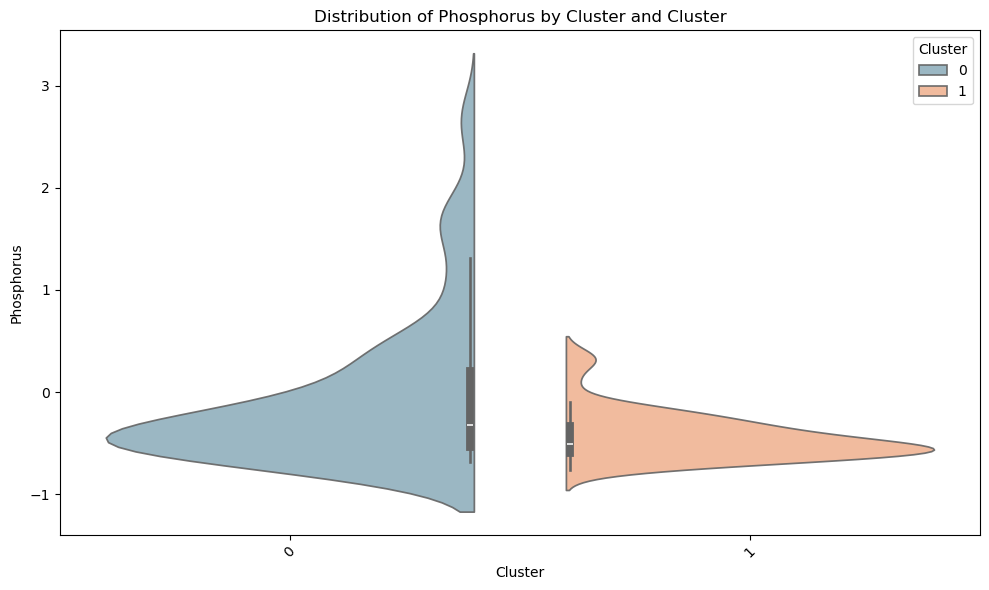

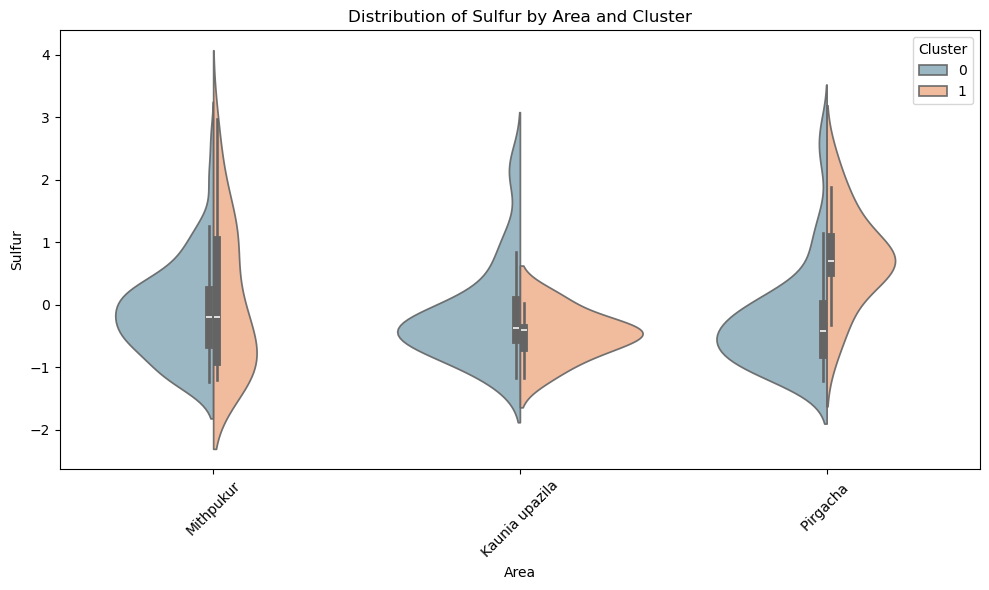

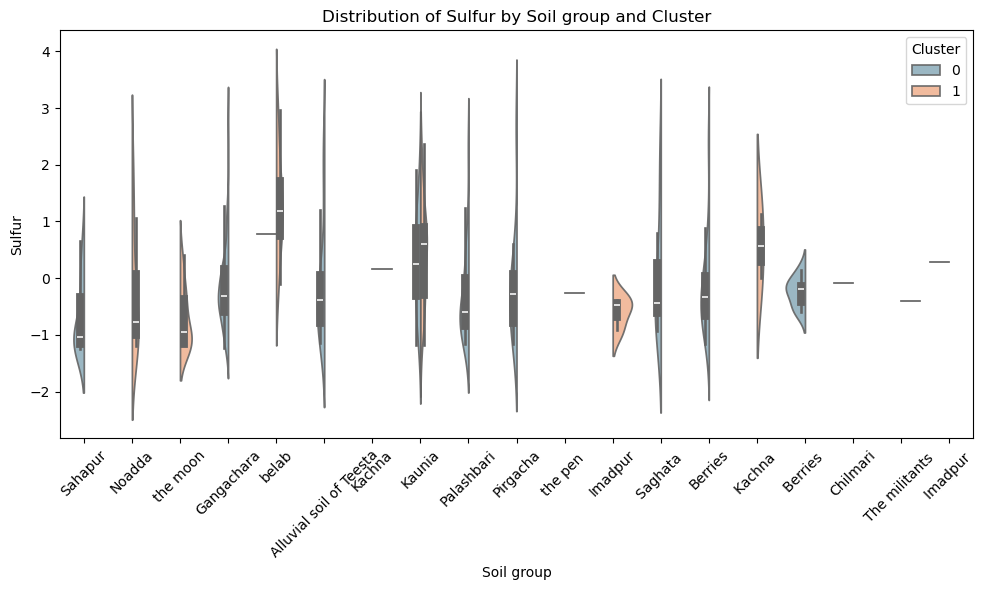

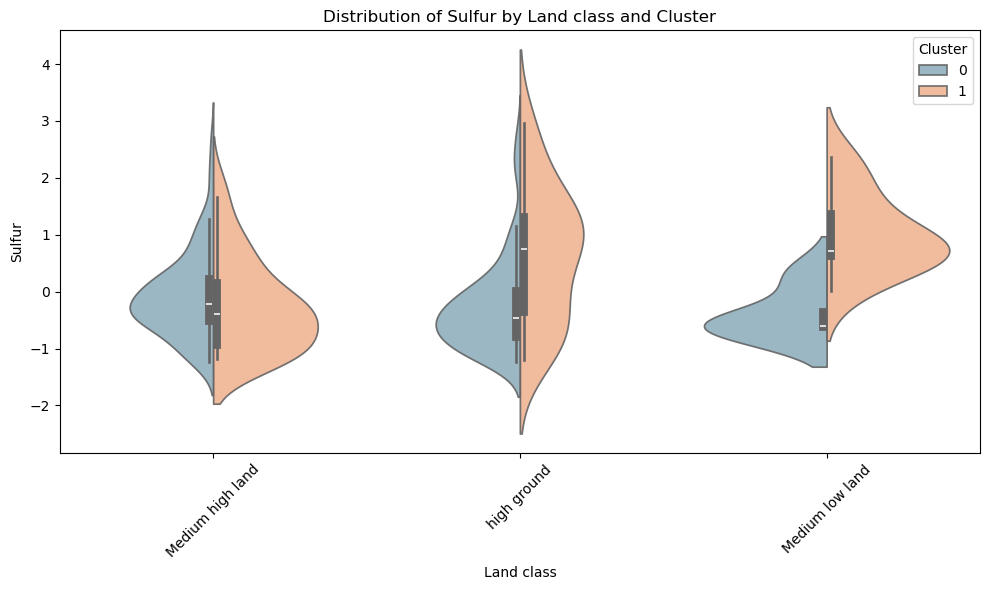

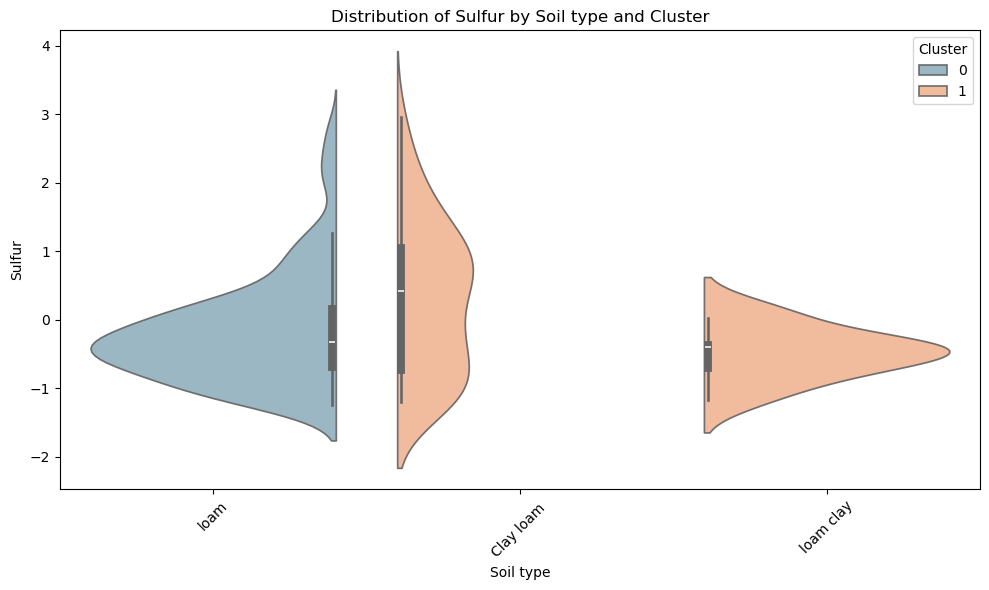

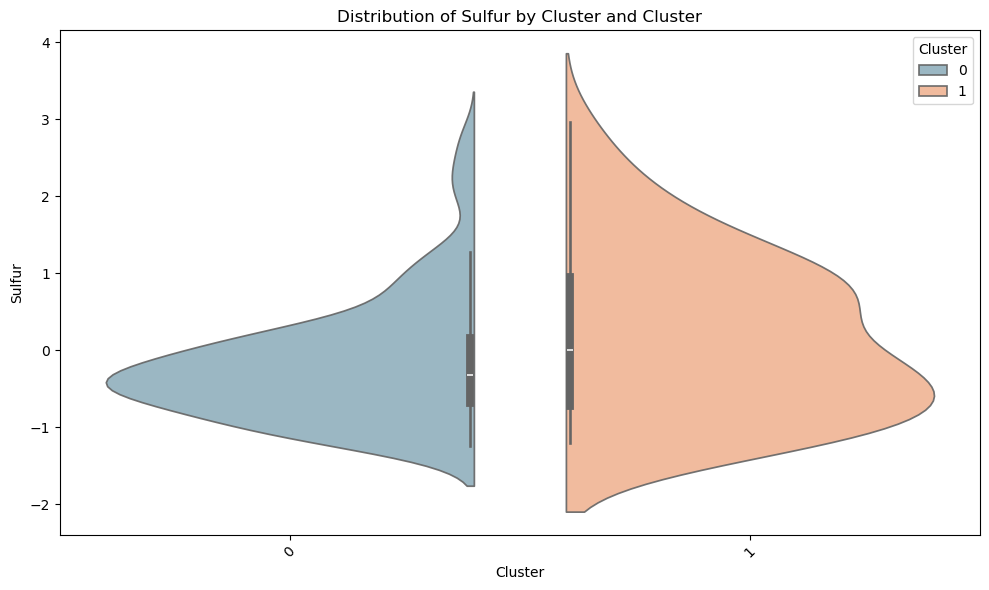

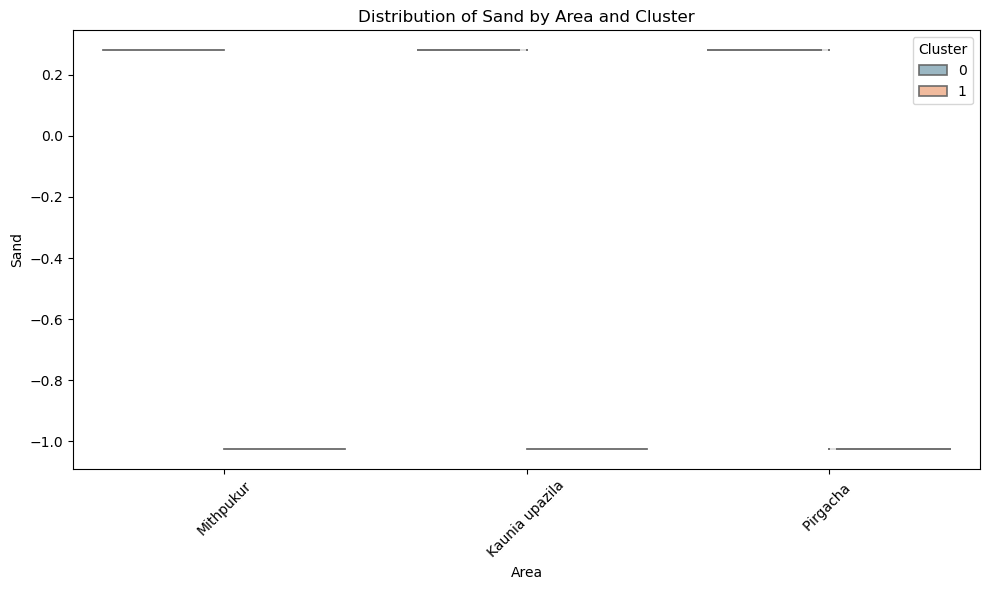

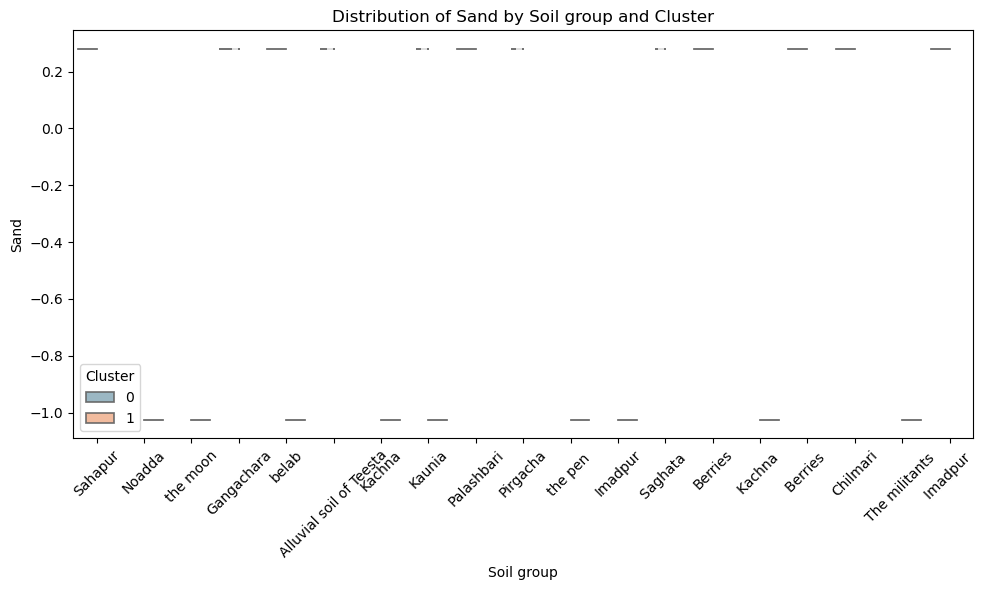

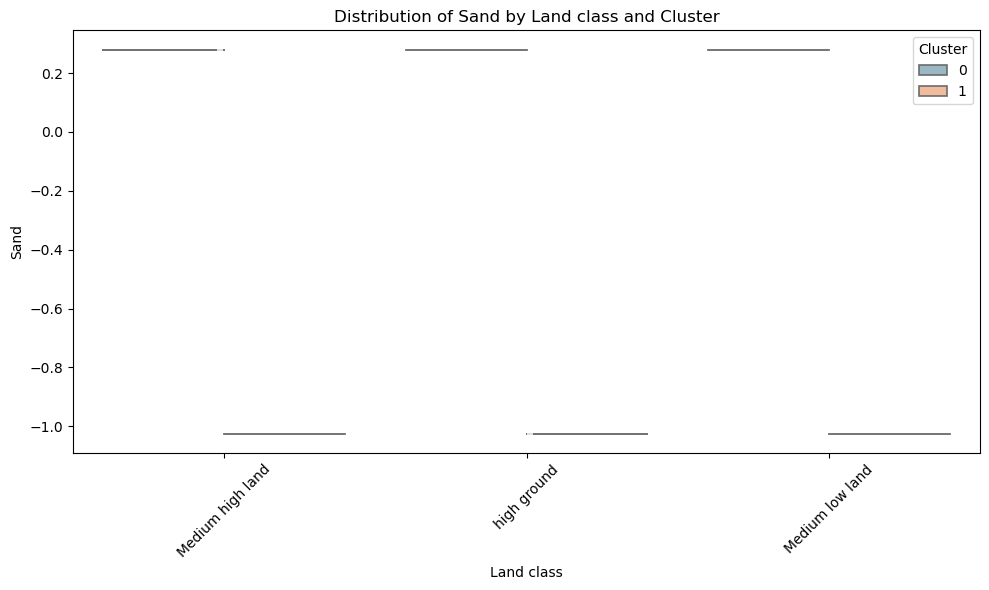

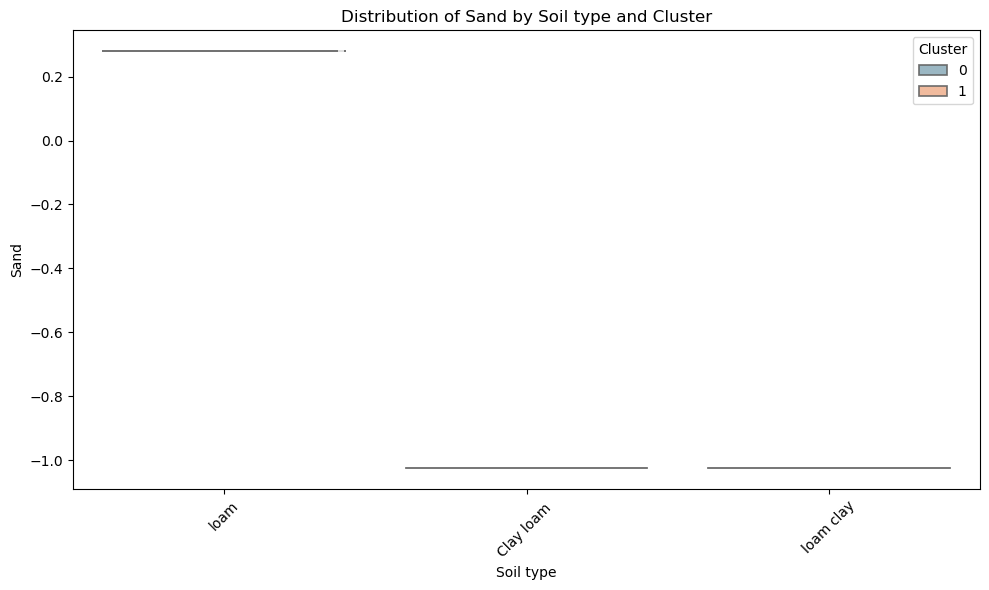

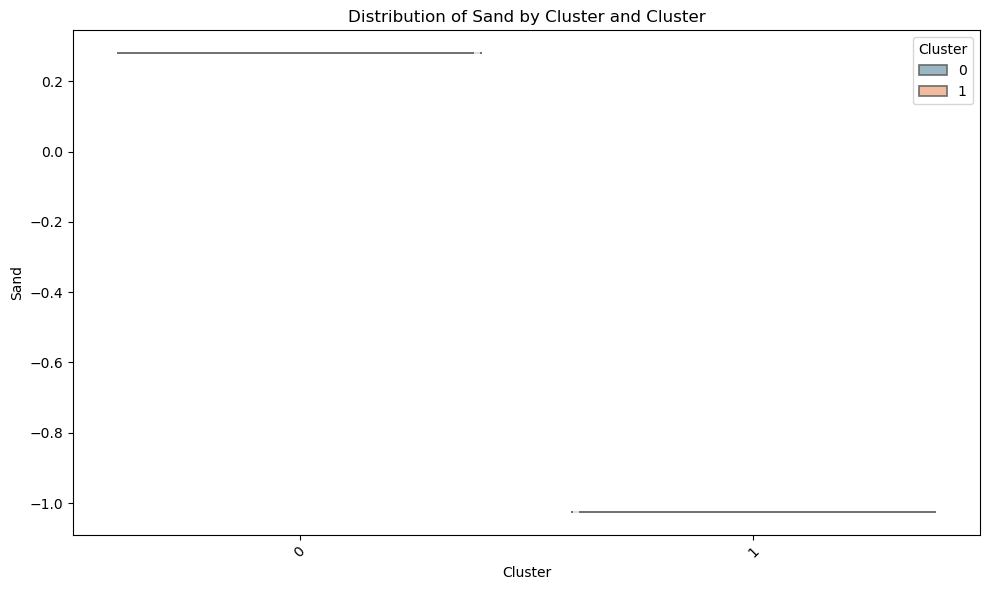

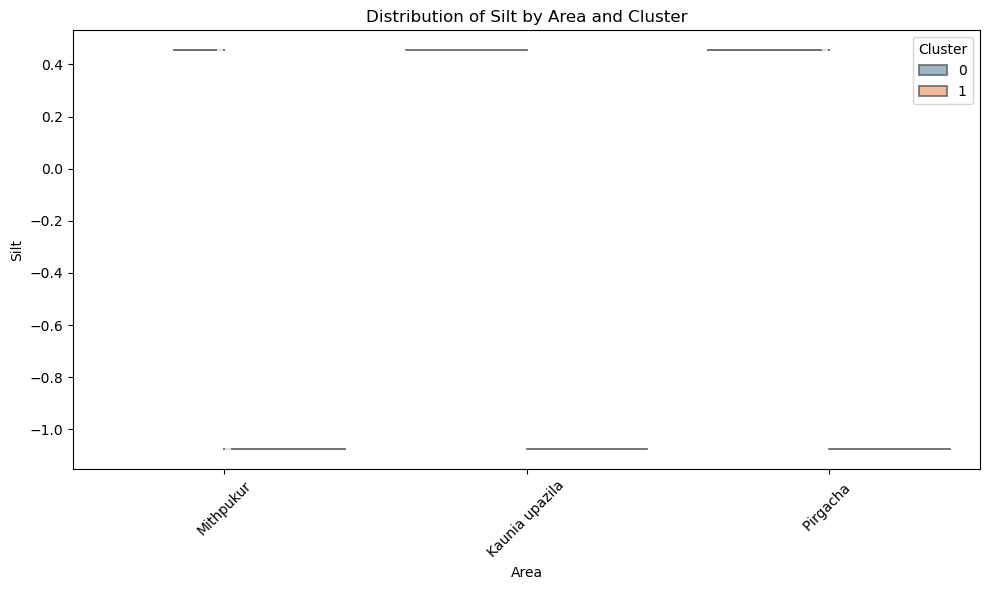

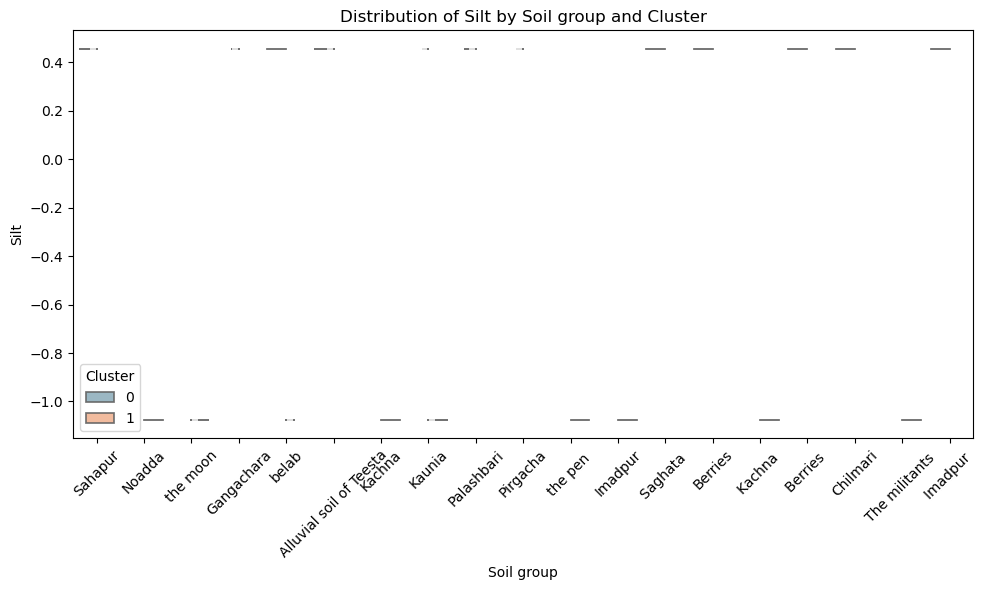

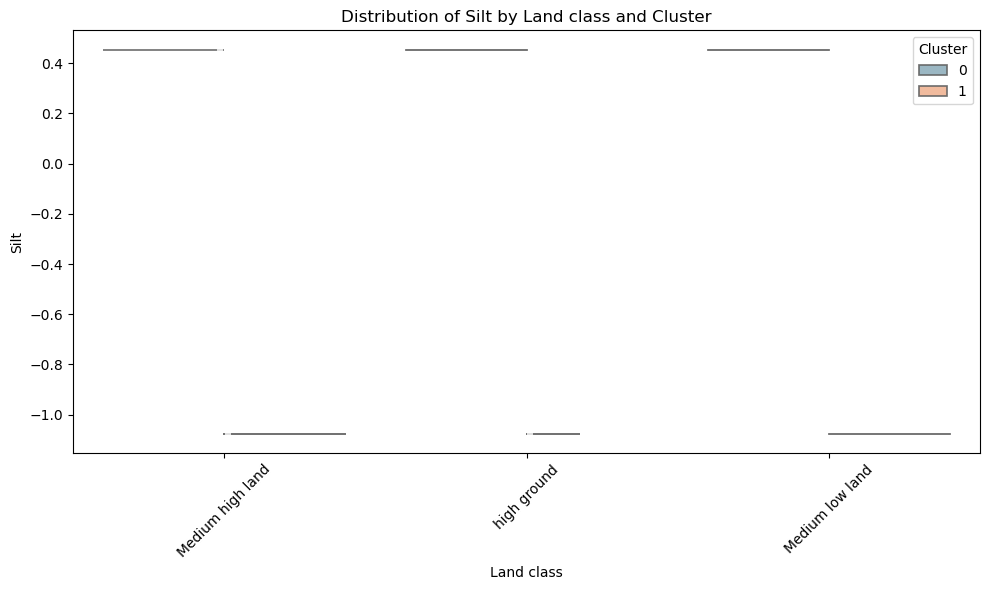

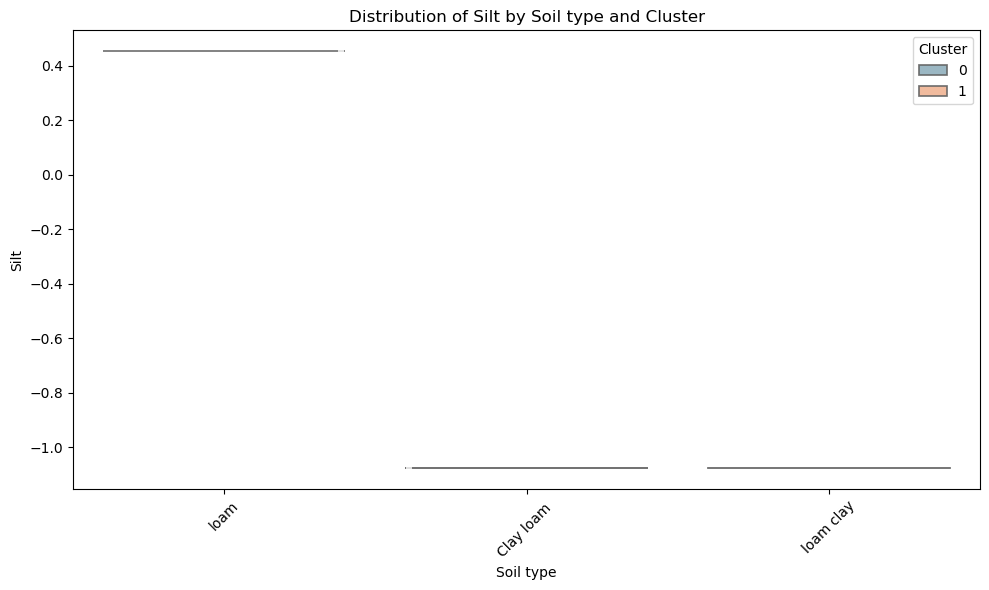

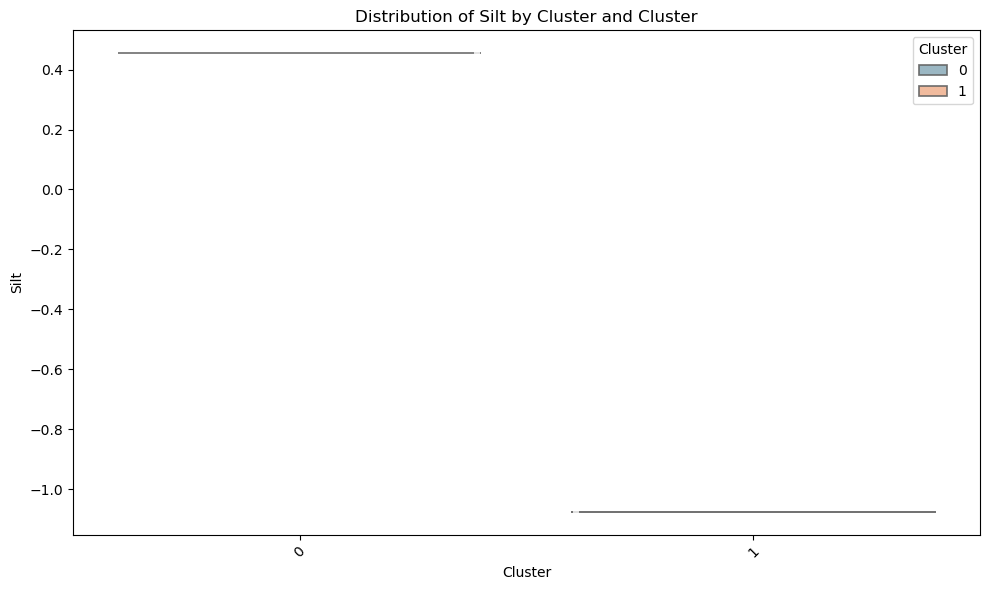

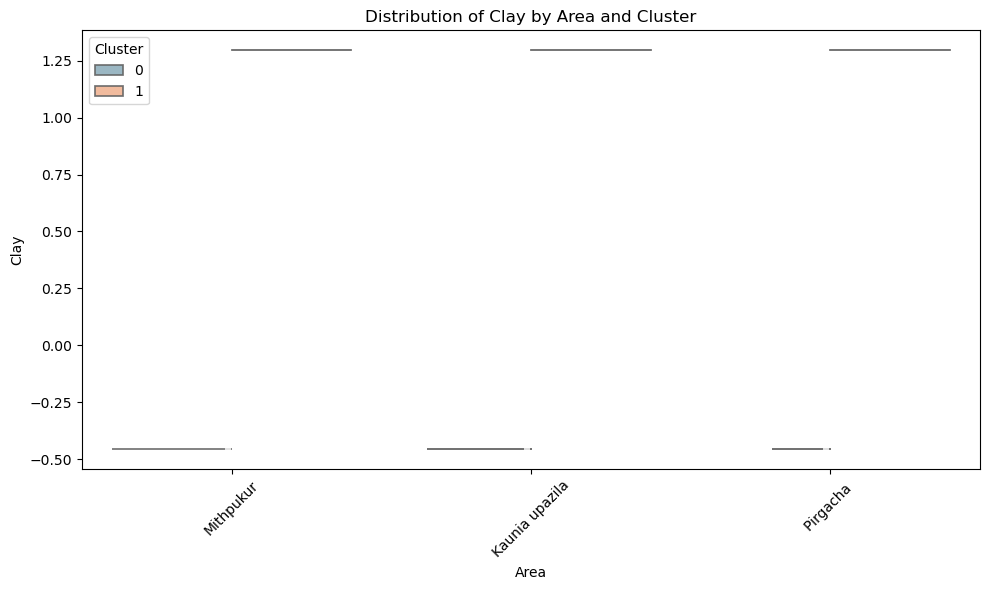

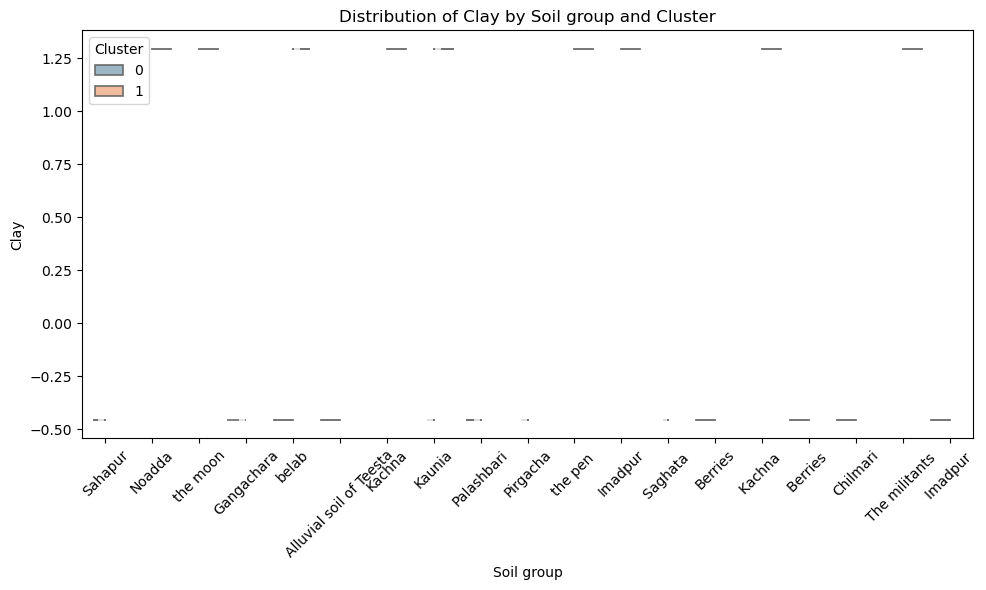

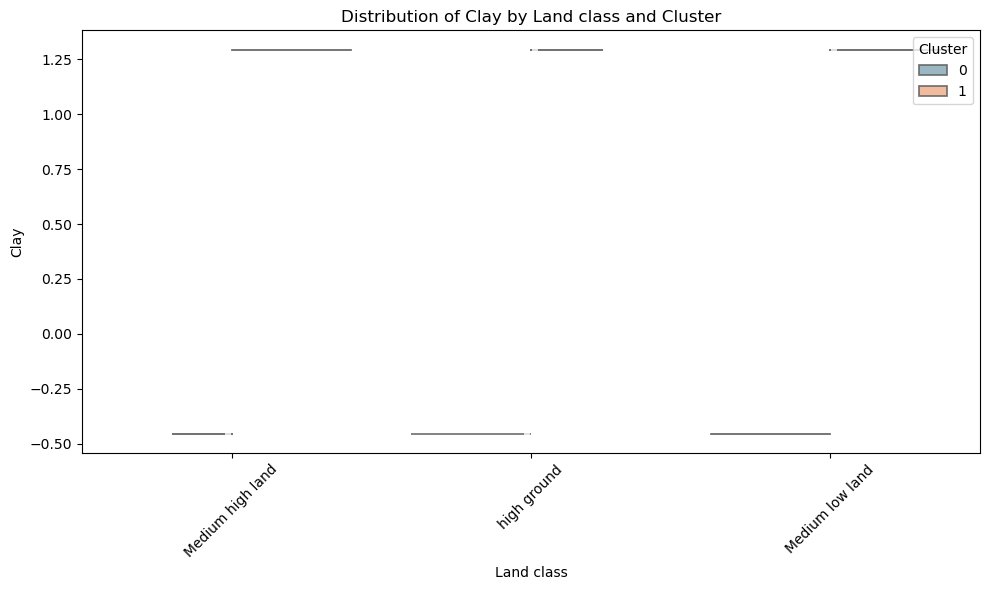

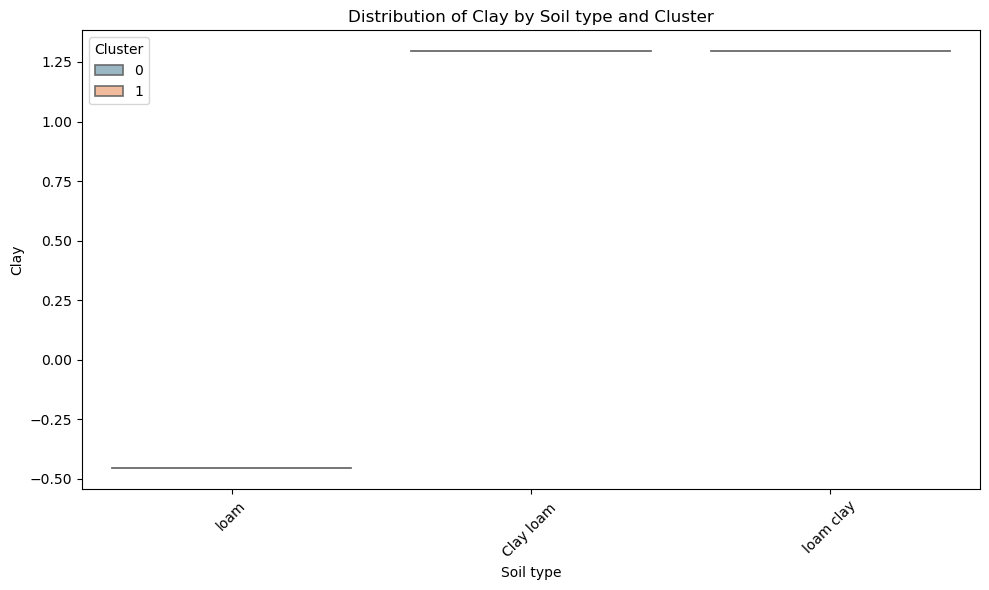

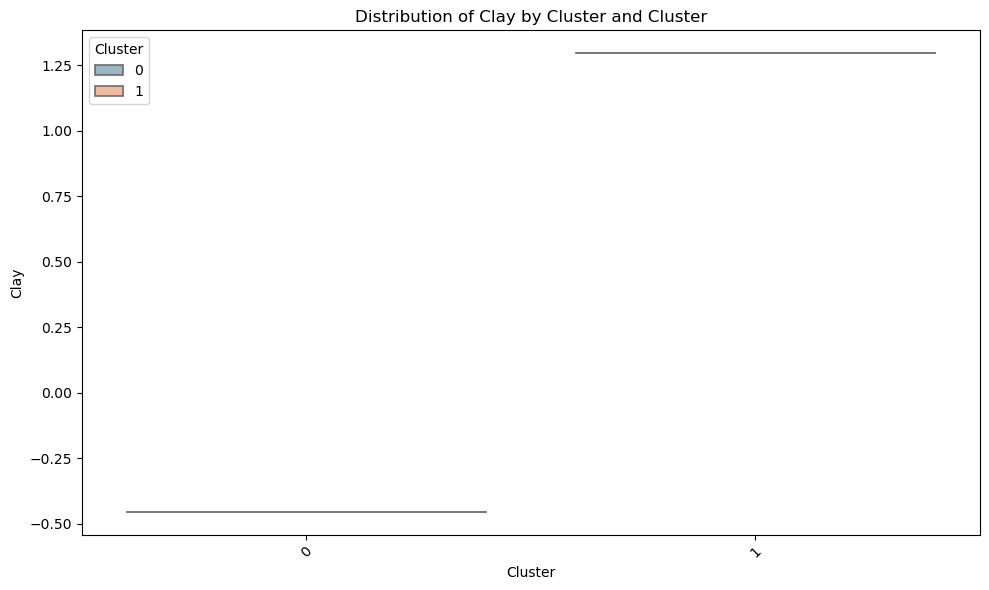

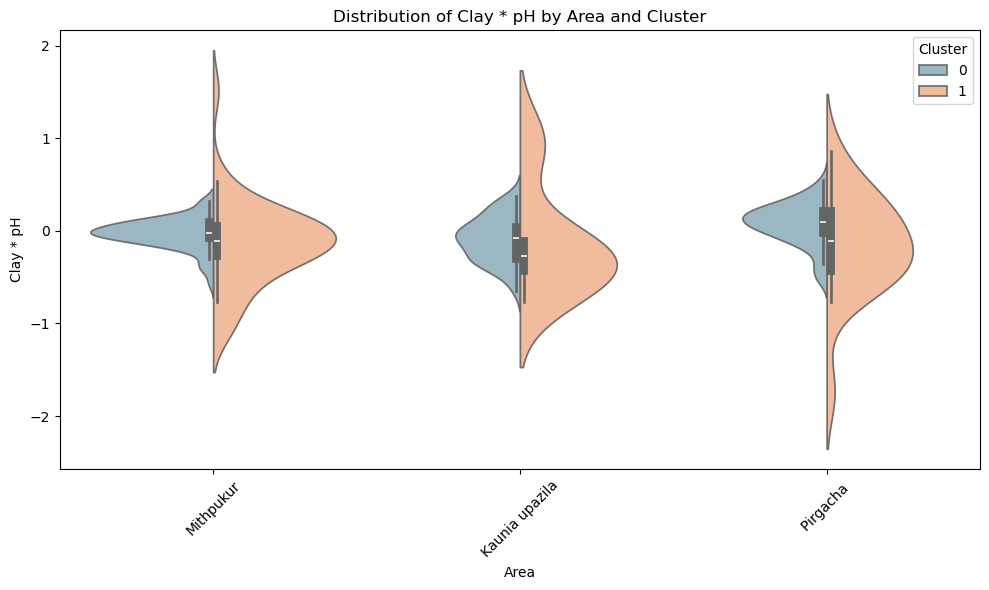

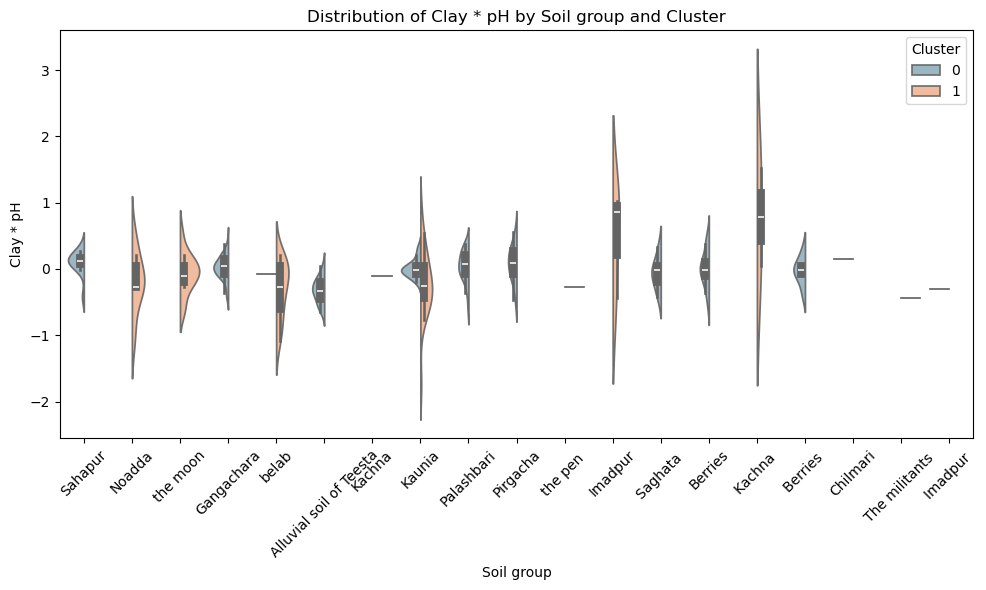

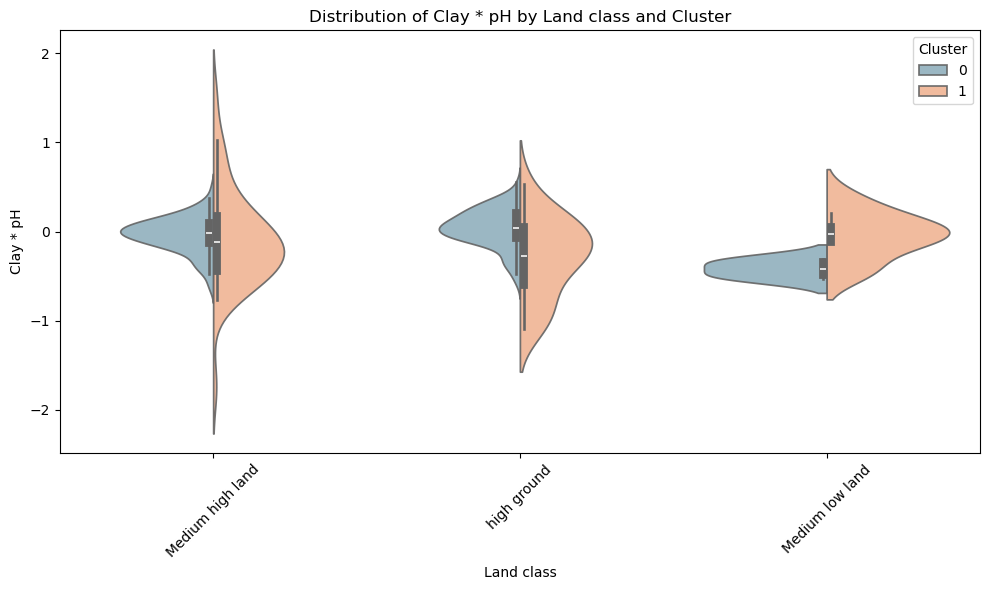

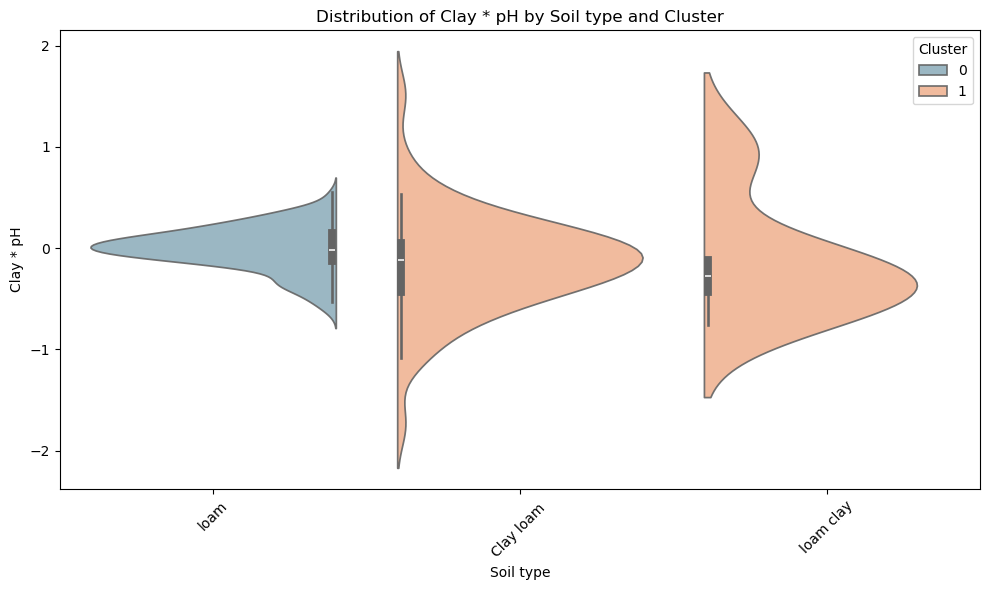

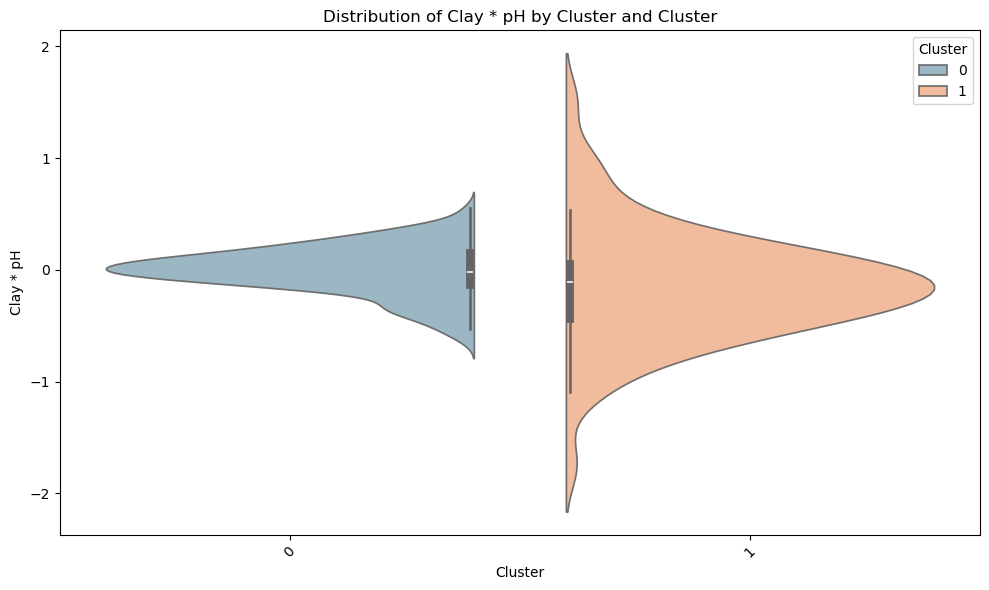

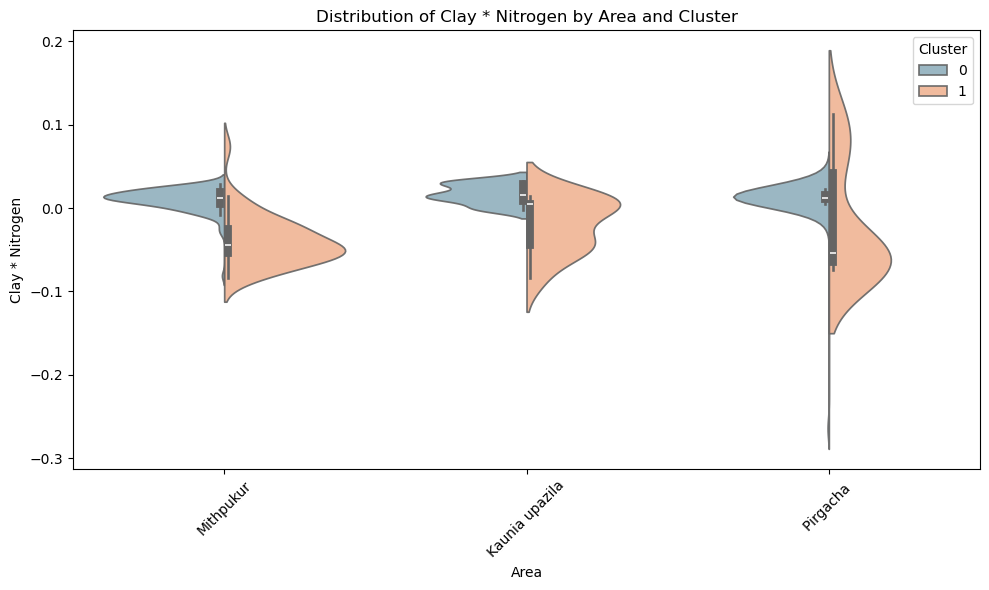

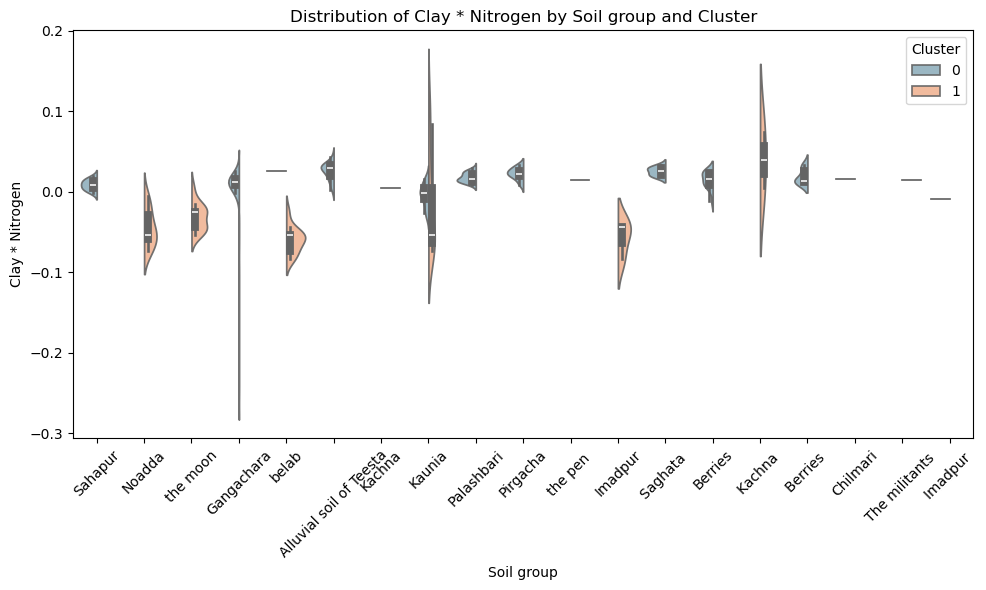

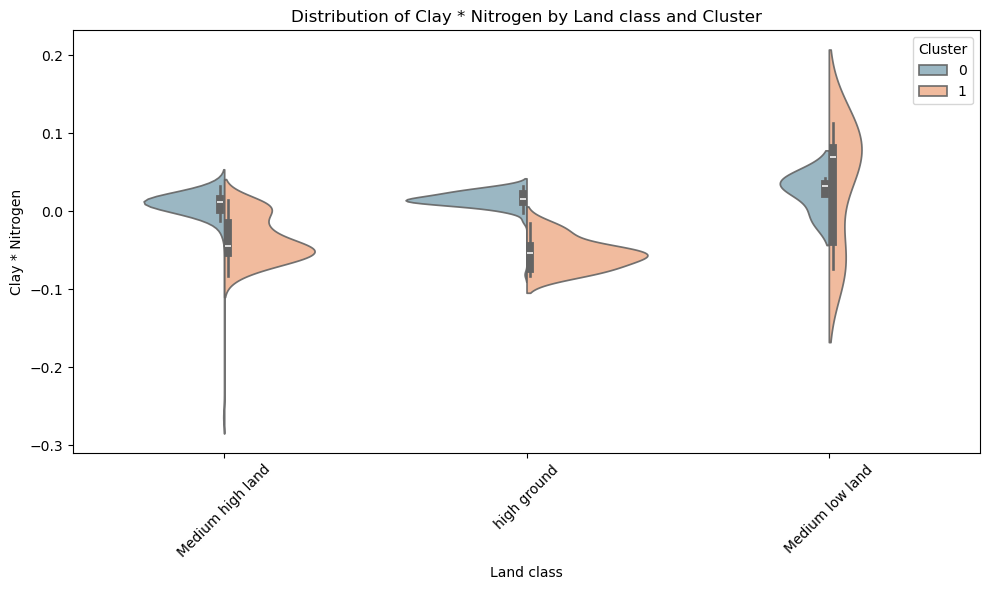

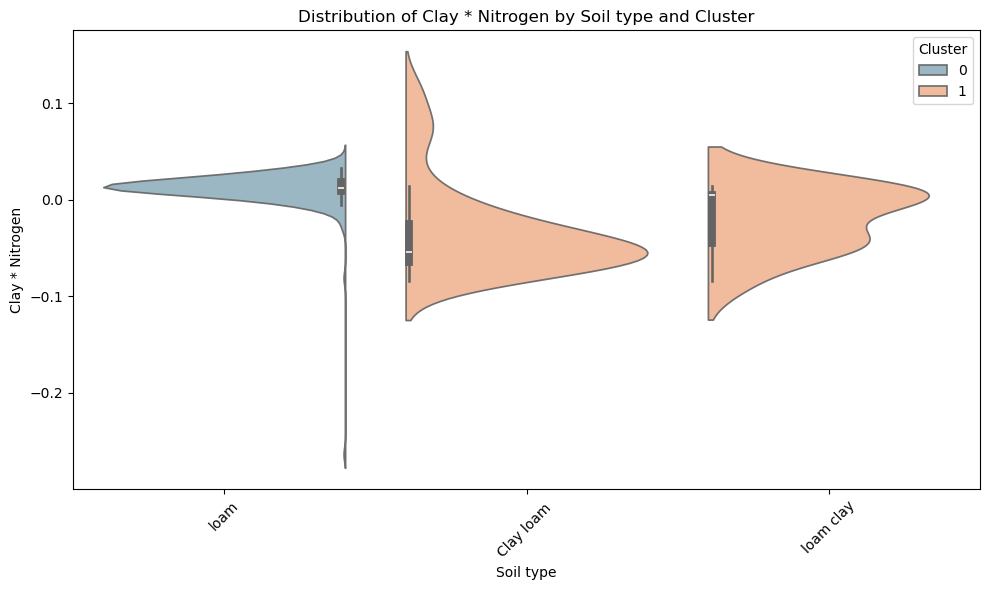

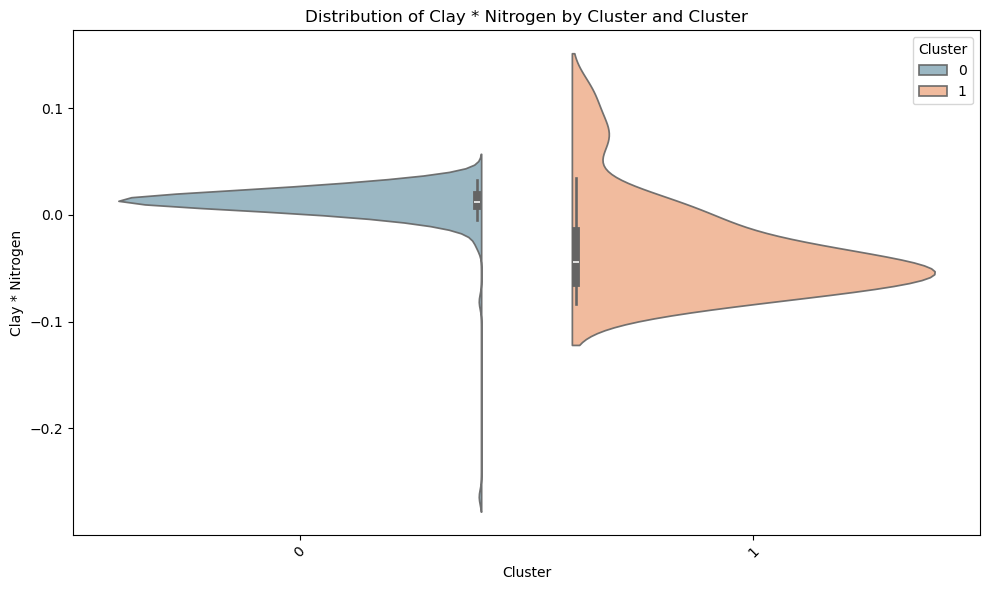

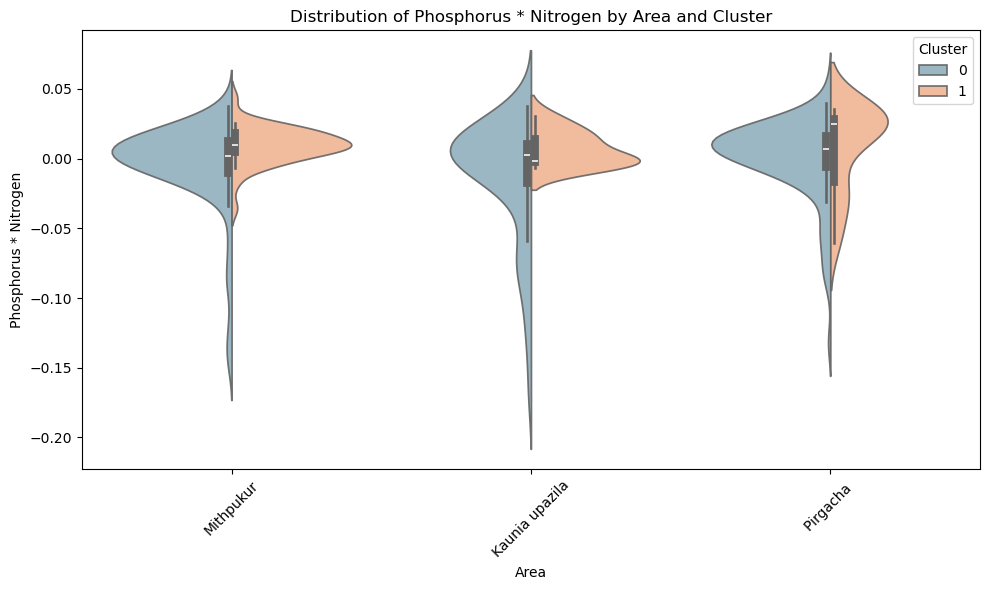

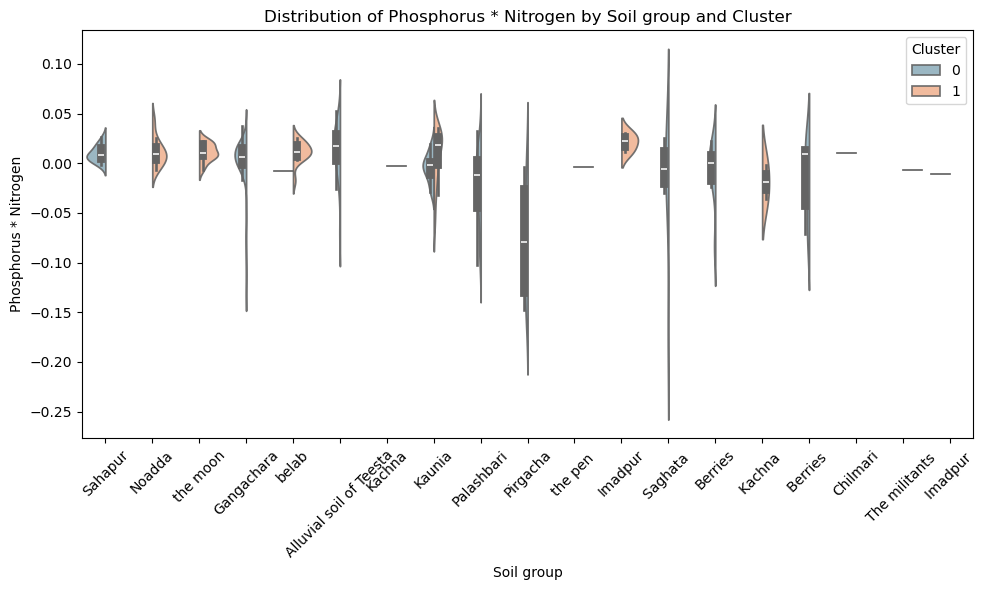

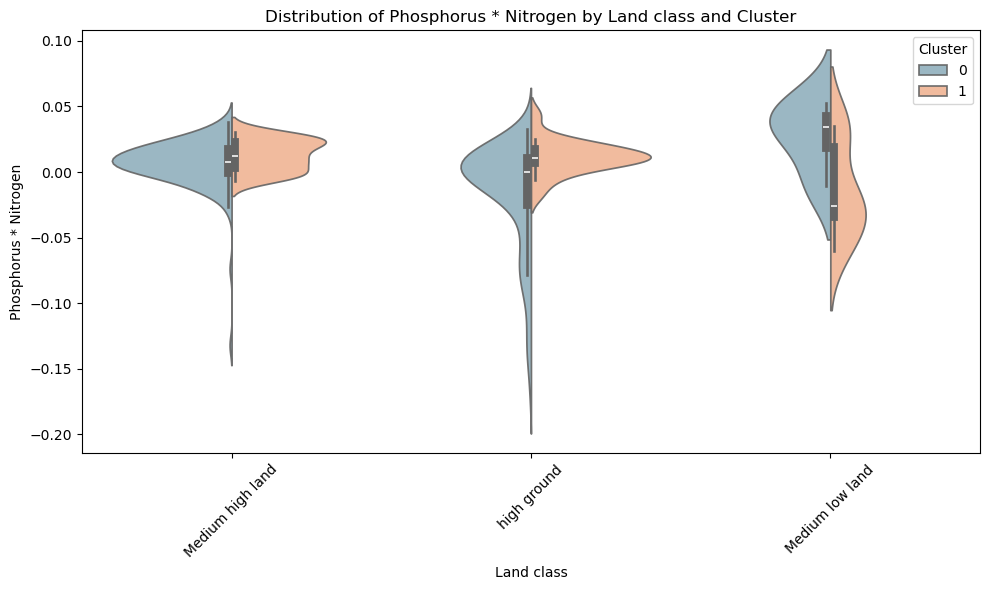

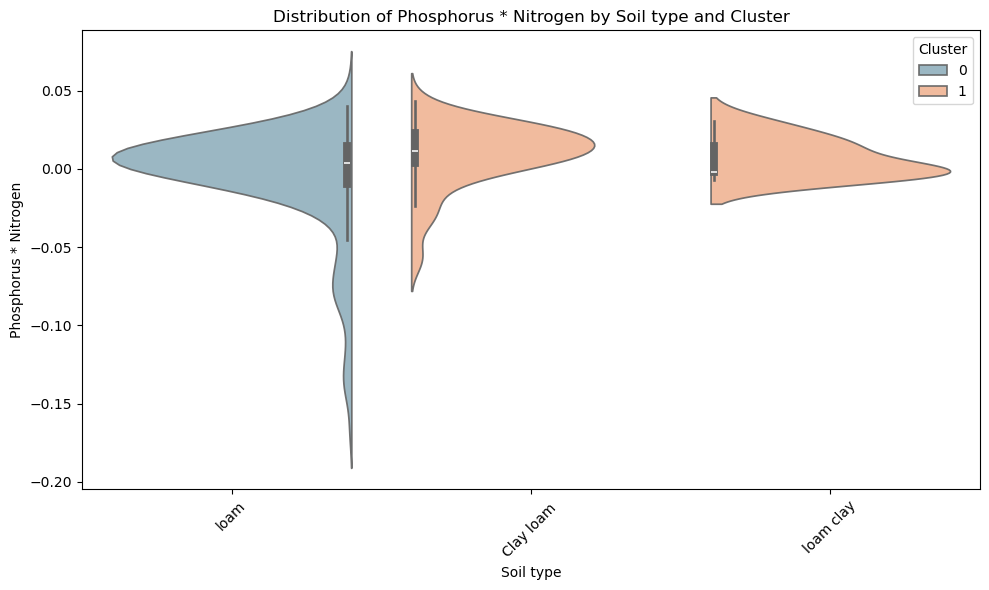

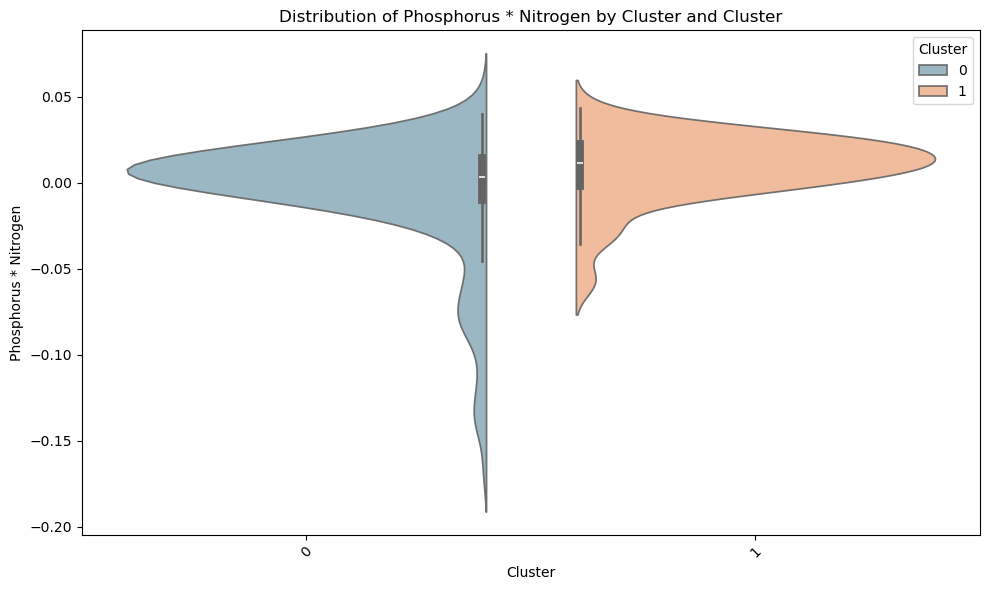

In [25]:
for feature in numerical_cols:
    for cat in categorical_cols + ['Cluster']:  # Including cluster column
        plt.figure(figsize=(10, 6))
        sns.violinplot(data=df,
                       x=cat,
                       y=feature,
                       hue='Cluster',
                       split=True,
                       alpha=0.9
        )
        plt.title(f"Distribution of {feature} by {cat} and Cluster")
        plt.xlabel(cat)
        plt.ylabel(feature)
        plt.legend(title="Cluster")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

### Clusters
- Appear to show differentiation along some of the numerical features between categorical variables
- Sometimes distributions are even between the clusters

### Sand, Silt and Clay
- Because I used the mean values for sand silt and clay for the soil typoe they were a part of, the distributions for these variables are flat
- Would be nice to have percentages as part of the dataset instead of aggregated in to soil groups

### Soil group
- Means of many variables are quite different amongst the different soil groups, hopefully the target encoded feature ends up being predictive
- High variance of numerical features within this category, likely because of a small dataset and high cardinality

### Land class
- Medium low land seems to consistently have quite different distributions when broken down by cluster, maybe this is because of the smaller sample size with that labelling or maybe there's another reason